# Создание первого чатбота

Чат-бот— это программа, которая имитирует реальный разговор с пользователем. Чат-боты позволяют общаться с помощью текстовых или аудио сообщений на сайтах, в мессенджерах, мобильных приложениях 

Основные преимущества

* Обеспечивают сервисное обслуживание 24/7
* Помогают охватить больше клиентов
* Экономность
* Легкость в эксплуатации
	
Как они работают?
Большинство людей не будут создавать своих чат-ботов с нуля, так как сегодня существует достаточно большой выбор всевозможных фреймворков и сервисов, которые могут помочь в создании чат-бота. Однако чтобы понять, как они работают нужно погрузиться немного глубже.
Бэкенд: Чат-боты могут быть разработаны на любом языке программирования
Фронтенд: Это может быть любой мессенджер: от популярных вроде Facebook Messenger, Slack, Telegram до простеньких Realtime Chat With Node.js. Вы не ограничены одной платформой: один и тот же бот может работать, по сути, везде.

## Шаг 1. Создаём бота в Telegram

Открываем телеграм и ищем чат @botfather. 
Сначала пишем /newbot. Затем задаем имя, потом id.
После создания бота нам придёт API токен, он нам понадобится в дальнейшем.

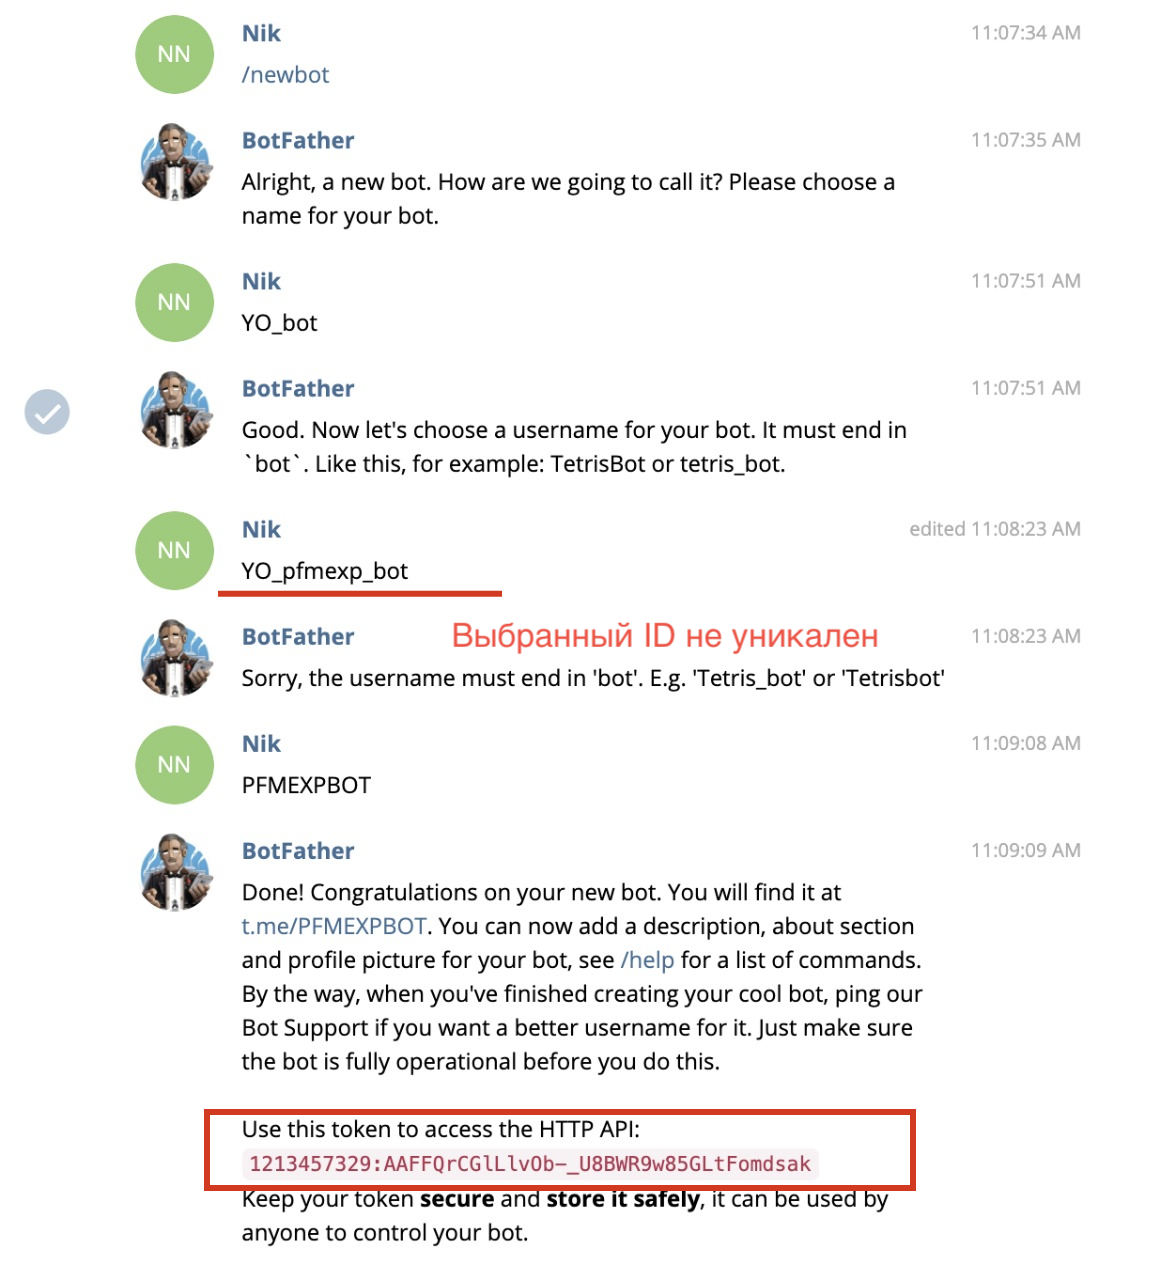

## Шаг 2. Пишем основу бота

Устанавливаем библиотеку python-telegram-bot. Ссылка на документацию https://github.com/python-telegram-bot/python-telegram-bot

In [13]:
!pip install python-telegram-bot==13.8


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.2/495.2 kB 2.9 MB/s eta 0:00:00a 0:00:01


In [2]:
!pip install python-telegram-bot --upgrade
!pip install dialogflow
!pip install google-cloud-dialogflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 kB 3.0 MB/s eta 0:00:00a 0:00:01
  Using cached APScheduler-3.6.3-py2.py3-none-any.whl (58 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 1.2 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 339.5/339.5 kB 20.4 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.0.0
    Uninstalling cachetools-5.0.0:
      Successfully uninstalled cachetools-5.0.0


Явно зададим кодировку нашего кода

telegram.ext подмодуль, предоставлющий простой в использовании интерфейс. Он состоит из нескольких классов, но двумя наиболее важными из них являются telegram.ext.Updater и telegram.ext.Dispatcher.
Класс Updater непрерывно получает новые обновления  из телеграмма и передает их в Dispatcher класс.
Если вы создадите Updater объект, он создаст Dispatcher для вас и свяжет их вместе.


Затем вы можете зарегистрировать обработчики разных типов в Dispatcher, который будет сортировать обновления, извлеченные в Updater соответствии с зарегистрированными вами обработчиками, и доставлять их в функцию обратного вызова, которую вы определили.


Напишем 2 обработчика команд. Это callback-функции, которые будут вызываться тогда, когда будет получено обновление. Напишем две таких функции для команды /start и для обычного любого текстового сообщения. В качестве аргументов туда передаются два параметра: bot и update. Bot содержит необходимые методы для взаимодействия с API, а update содержит данные о пришедшем сообщении.


Каждый обработчик является экземпляром любого подкласса класса telegram.ext.Handler . Библиотека предоставляет классы-обработчики почти для всех вариантов использования, но если вам нужно что-то очень конкретное, вы также можете создать подкласс Handler самостоятельно.

Теперь осталось лишь присвоить уведомлениям эти обработчики и начать поиск обновлений.
Цель состоит в том, чтобы вызывать эту функцию каждый раз, когда бот получает сообщение Telegram, содержащее /start команду. Для этого можно использовать CommandHandler(один из предоставленных подклассов Handler) и зарегистрировать его в диспетчере:
Класс Filters содержит ряд функций, которые фильтруют входящие сообщения на наличие текста, изображений, обновлений статуса и т.д. 
Любое сообщение, которое возвращает True в хотя бы одном из переданных фильтров, MessageHandler примет. Также можно написать свои собственные фильтры.


In [1]:
from telegram import Update
from telegram.ext import Updater, CommandHandler, MessageHandler, Filters, CallbackContext

In [2]:
# Define a few command handlers. These usually take the two arguments update and
# context. Error handlers also receive the raised TelegramError object in error.
def start(update: Update, context: CallbackContext):
    update.message.reply_text('Hi!')

def echo(update: Update, context: CallbackContext):
    txt = update.message.text
    
    update.message.reply_text('Ваше сообщение! ' + update.message.text)

In [3]:
updater = Updater("5037721599:AAFxPl5Xk0dHR_u2scLj8rA82xR8g1t38qY", use_context=True)
dispatcher = updater.dispatcher

# on different commands - answer in Telegram
dispatcher.add_handler(CommandHandler("start", start))
dispatcher.add_handler(MessageHandler(Filters.text & ~Filters.command, echo))

# Start the Bot
updater.start_polling()
updater.idle()

Создаём папку Bot, в которой потом создаём файл bot.py. 
Вы можете создать просто текстовый блокнот и вместо расширения .txt  напишите .py
Собираем код нашего бота.
Открываем консоль и переходим в директорию с файлом, и запускаем python3 bot.py
Бот будет работать пока будет открыто окно консоли. 

## Шаг 3 Dialogflow

https://dialogflow.cloud.google.com/#/login

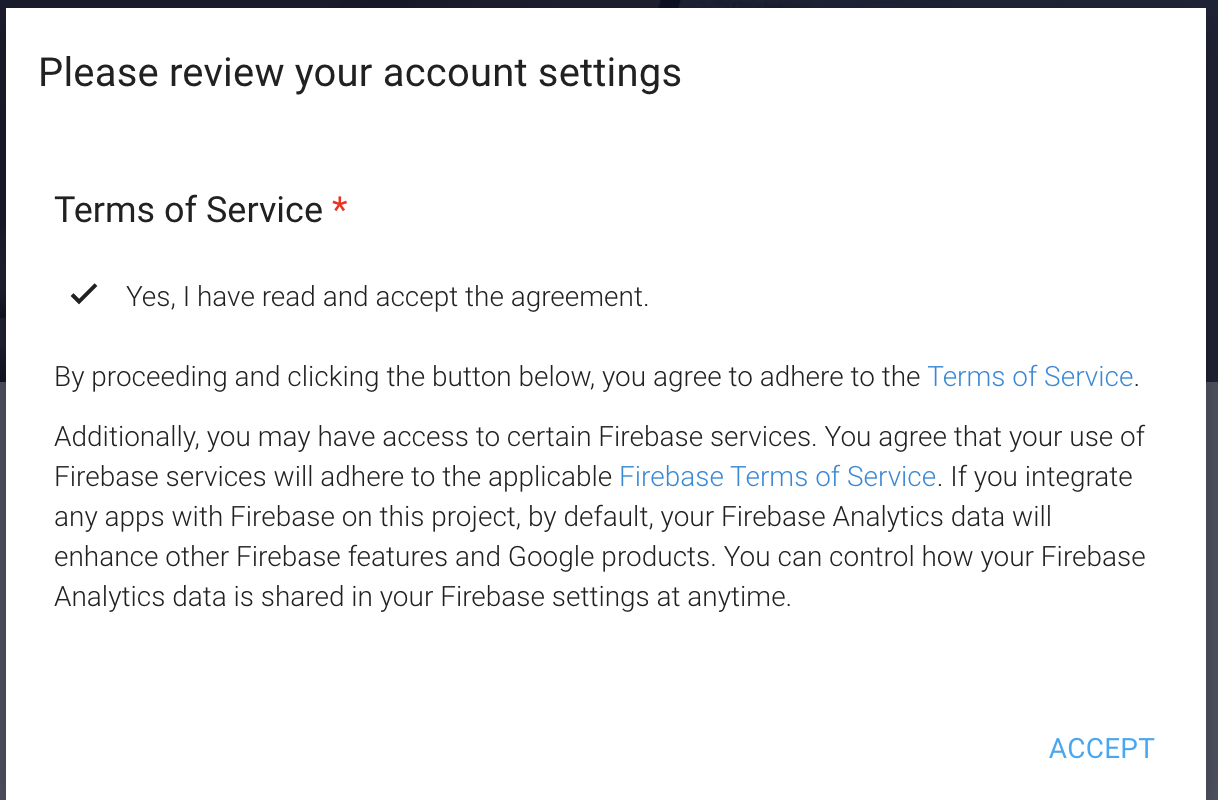

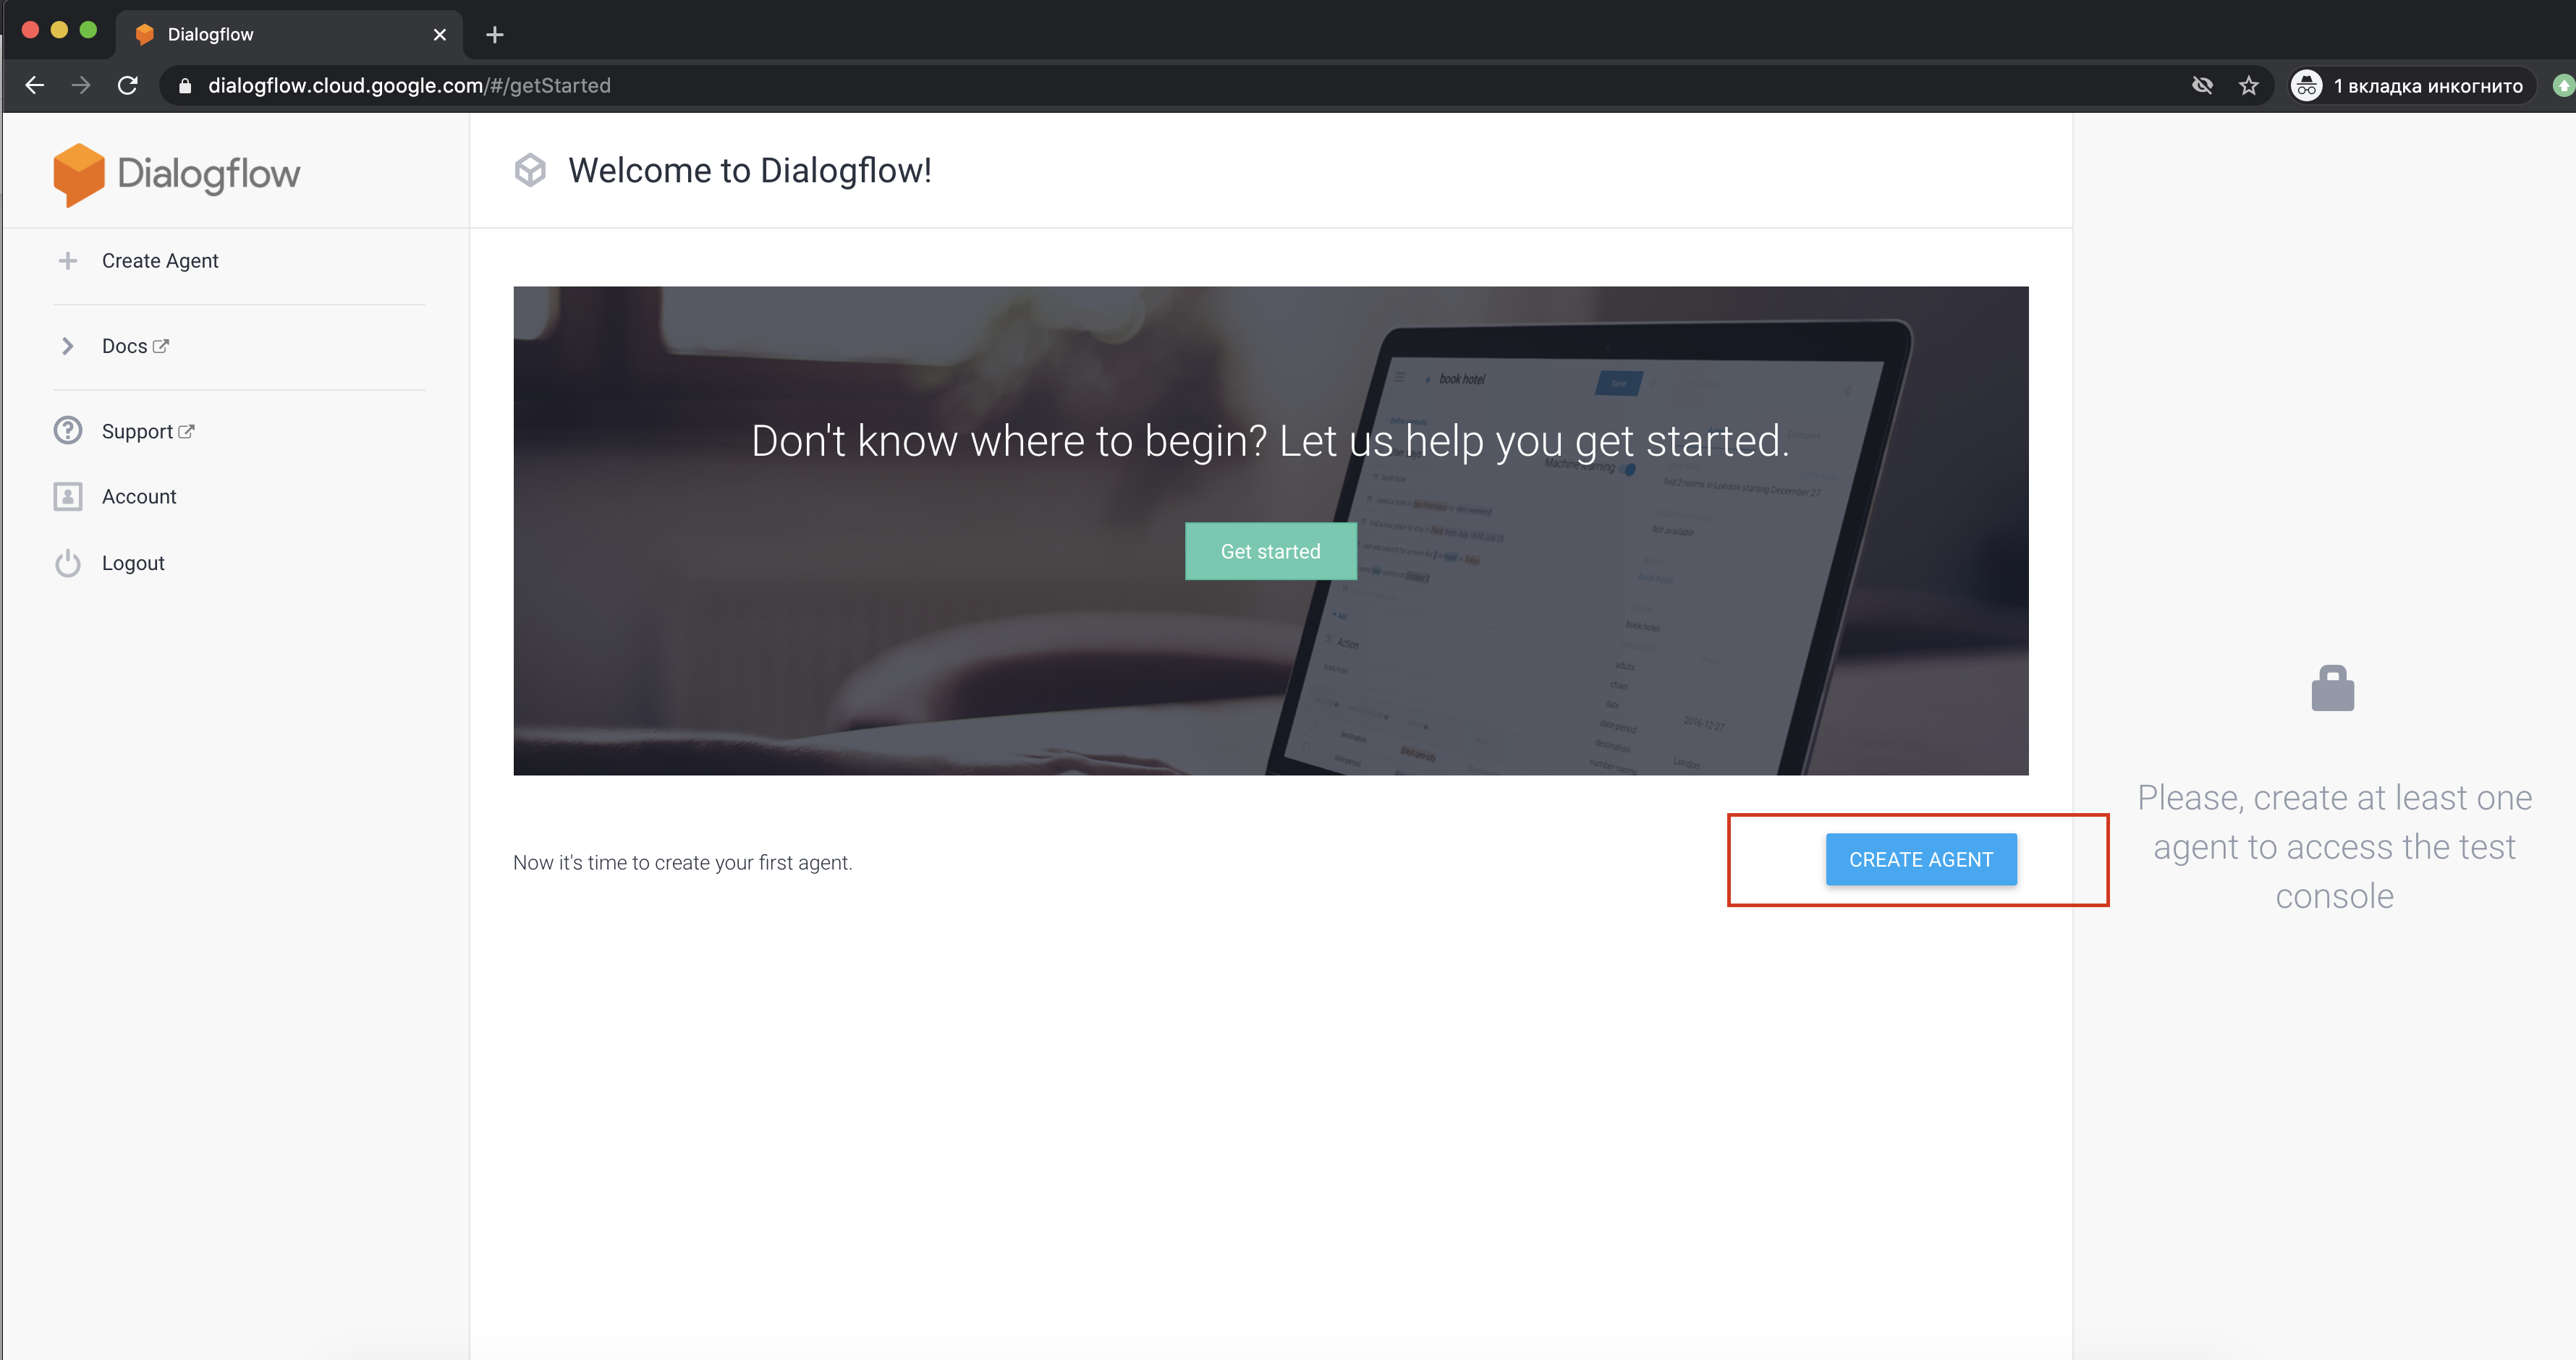

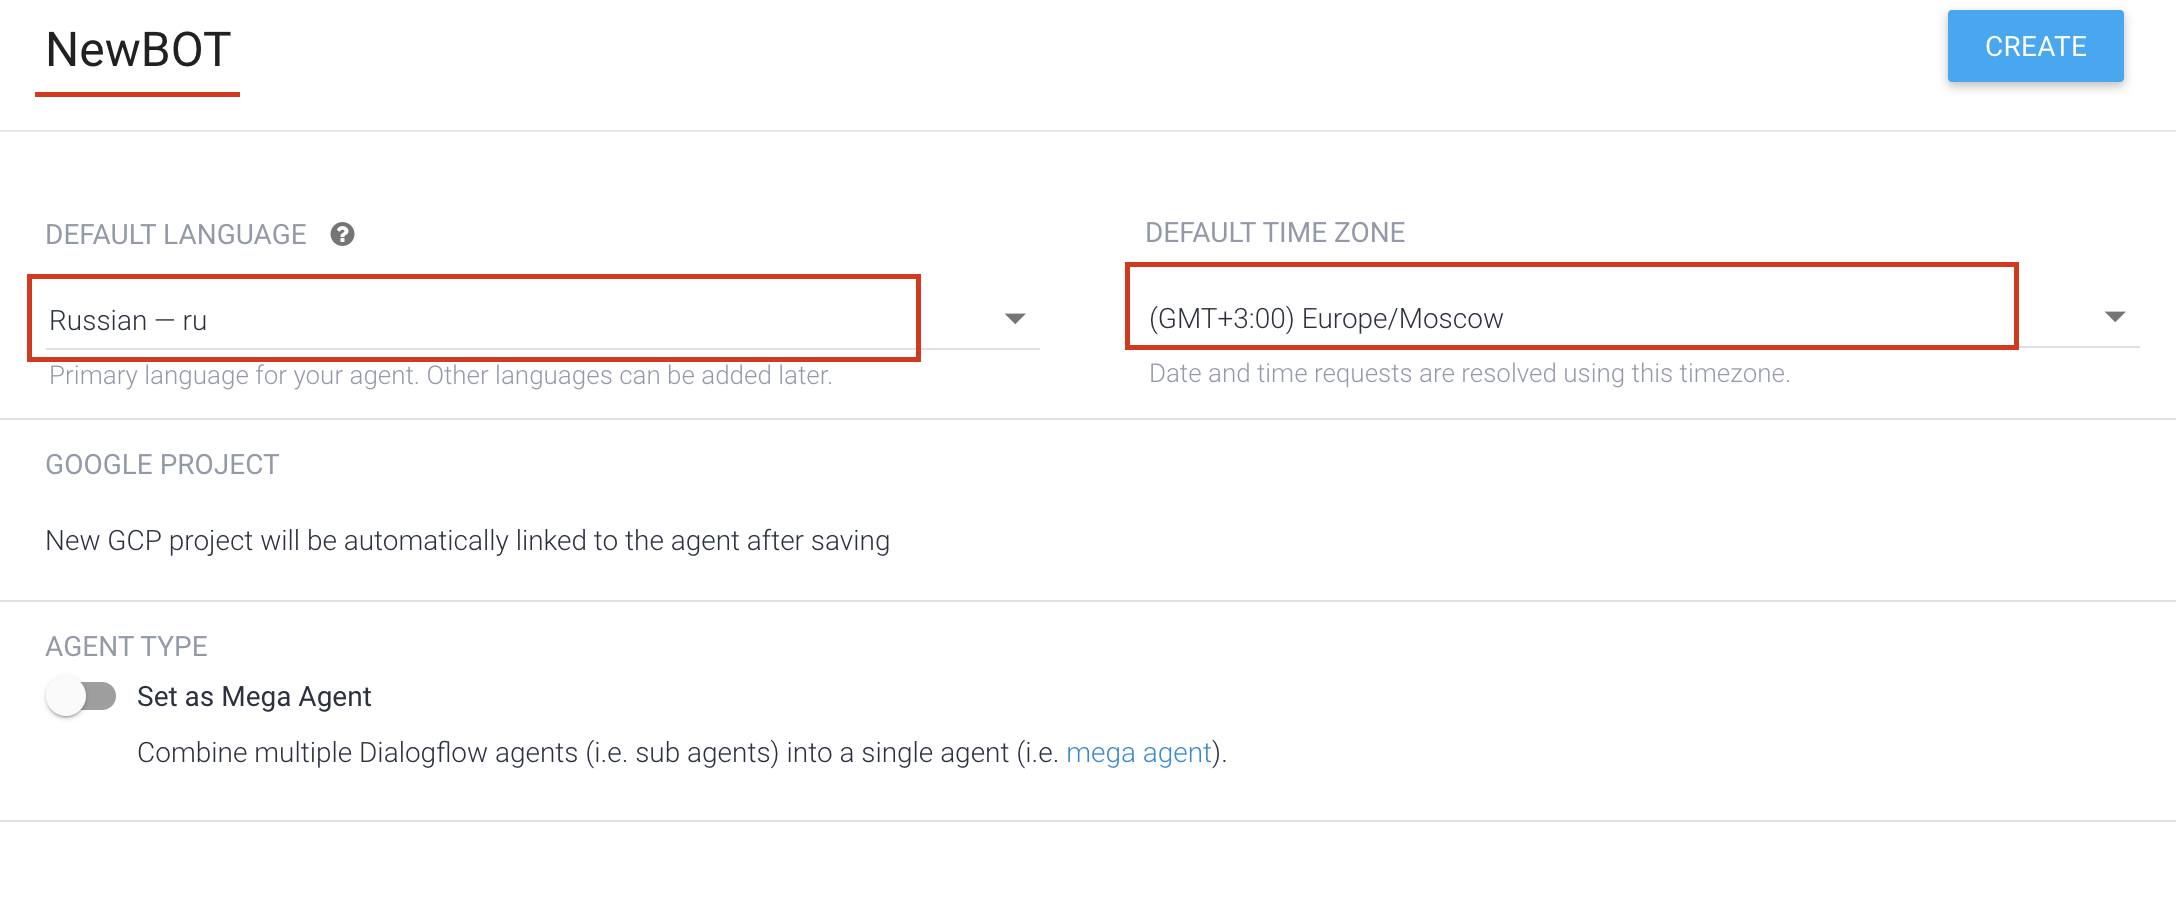

Панель управления слева.  Выбираем Small-talk

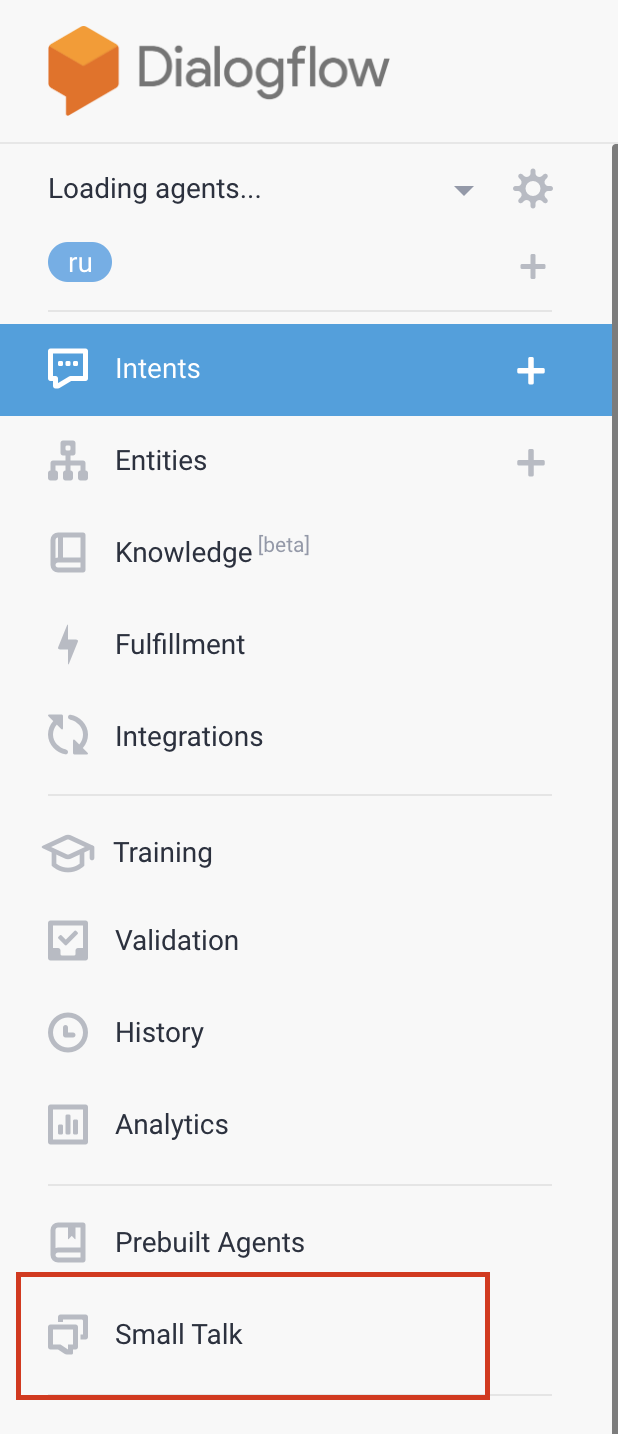

Выбинаем Enable и SAVE

Снимок экрана 2020-07-19 в 16.21.00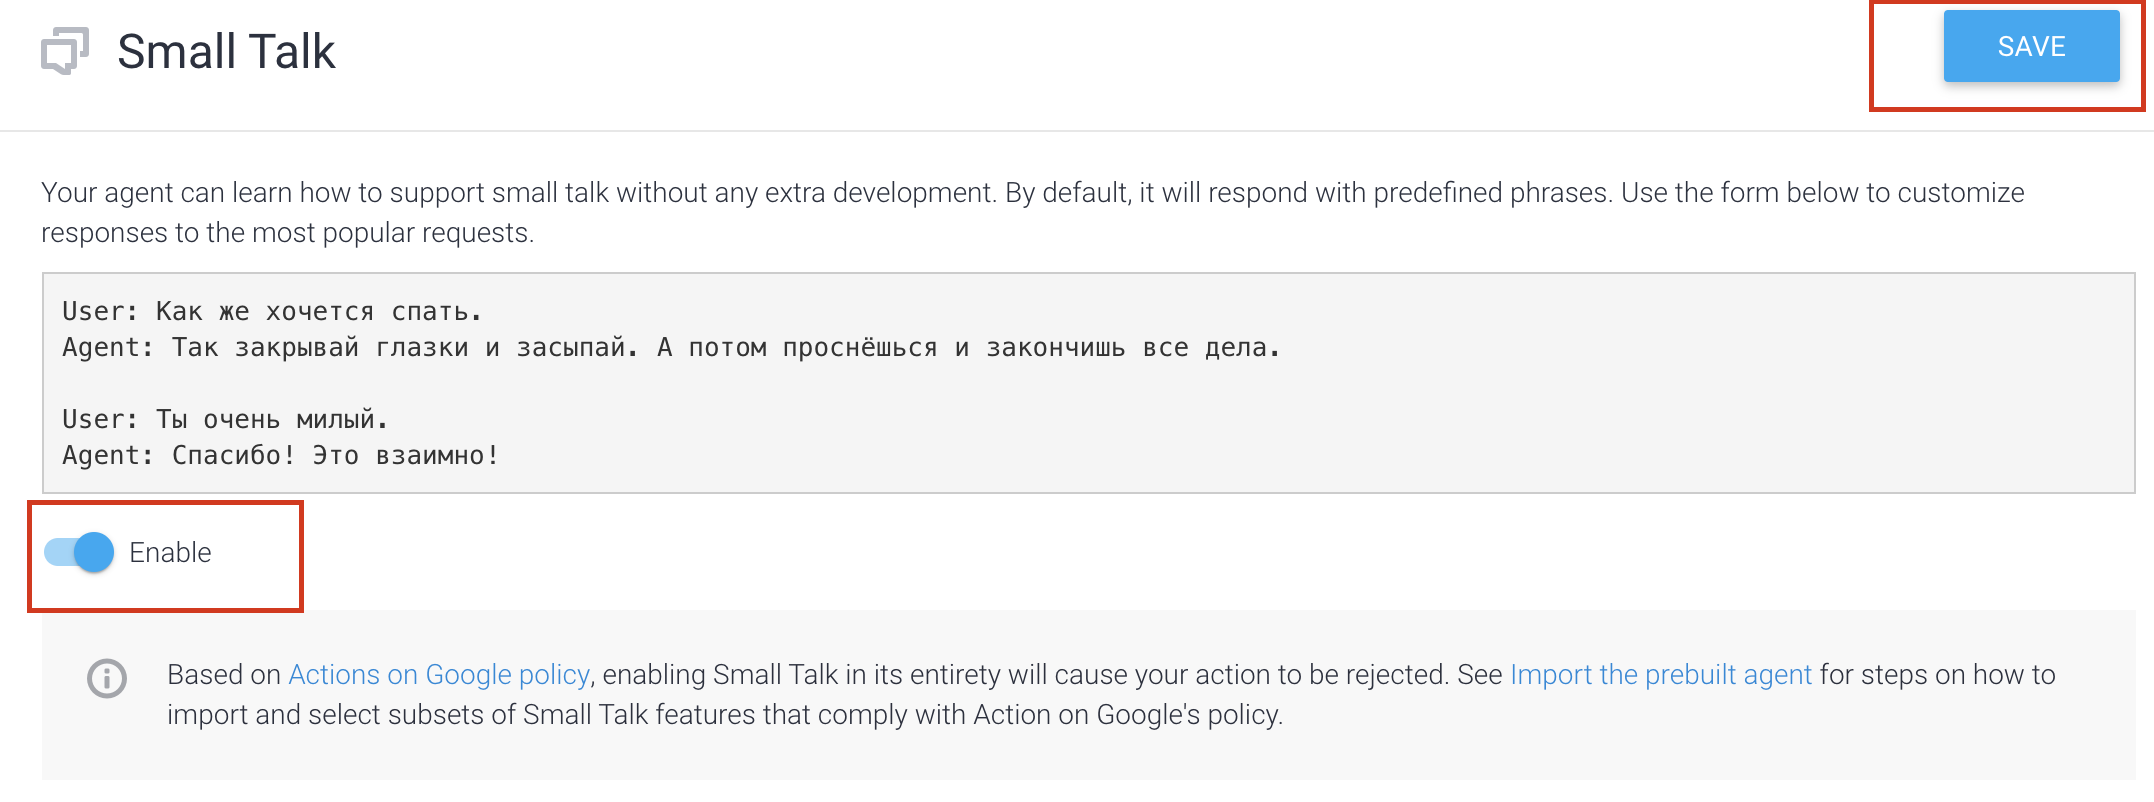

Бот можно протестировать справа

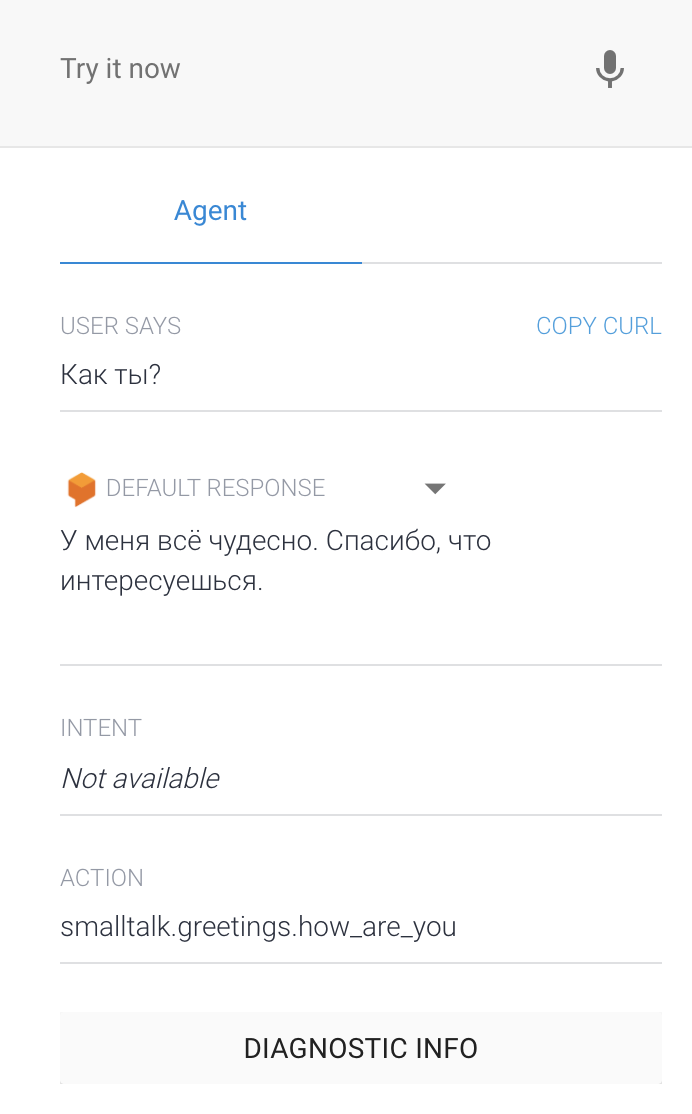

Переходим на страничку с документацией https://googleapis.dev/python/dialogflow/latest/index.html
И проходим по ссылке

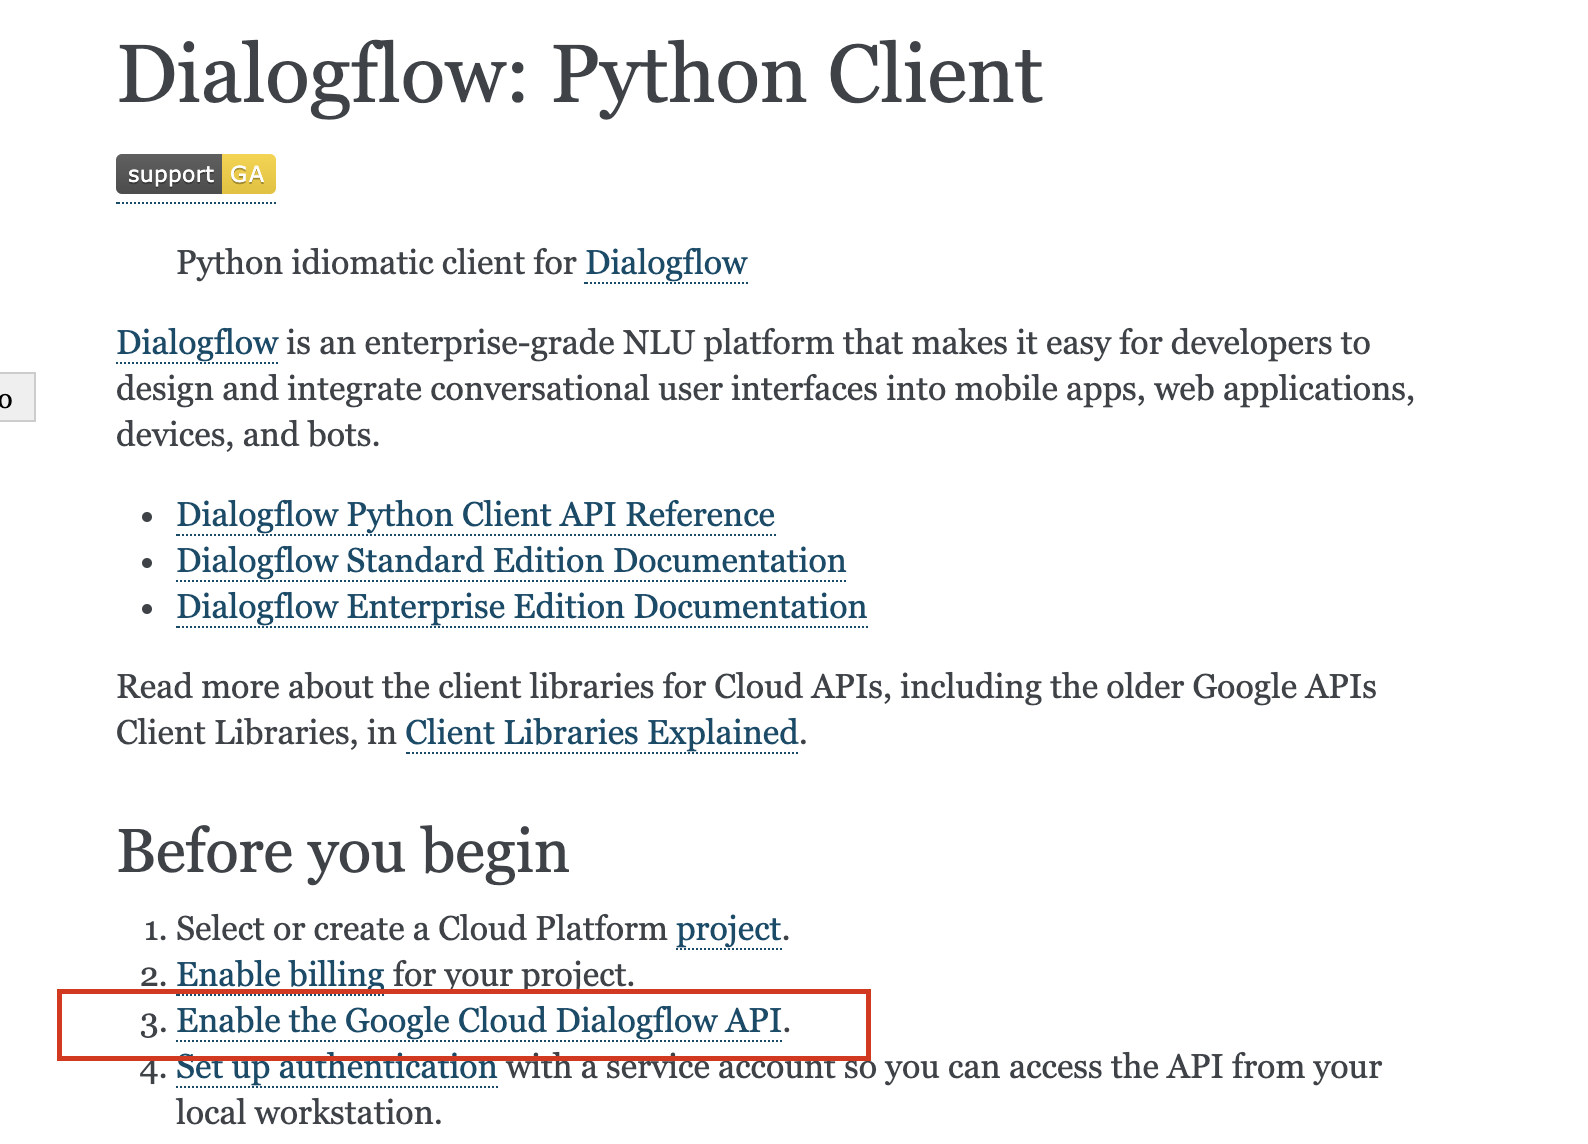

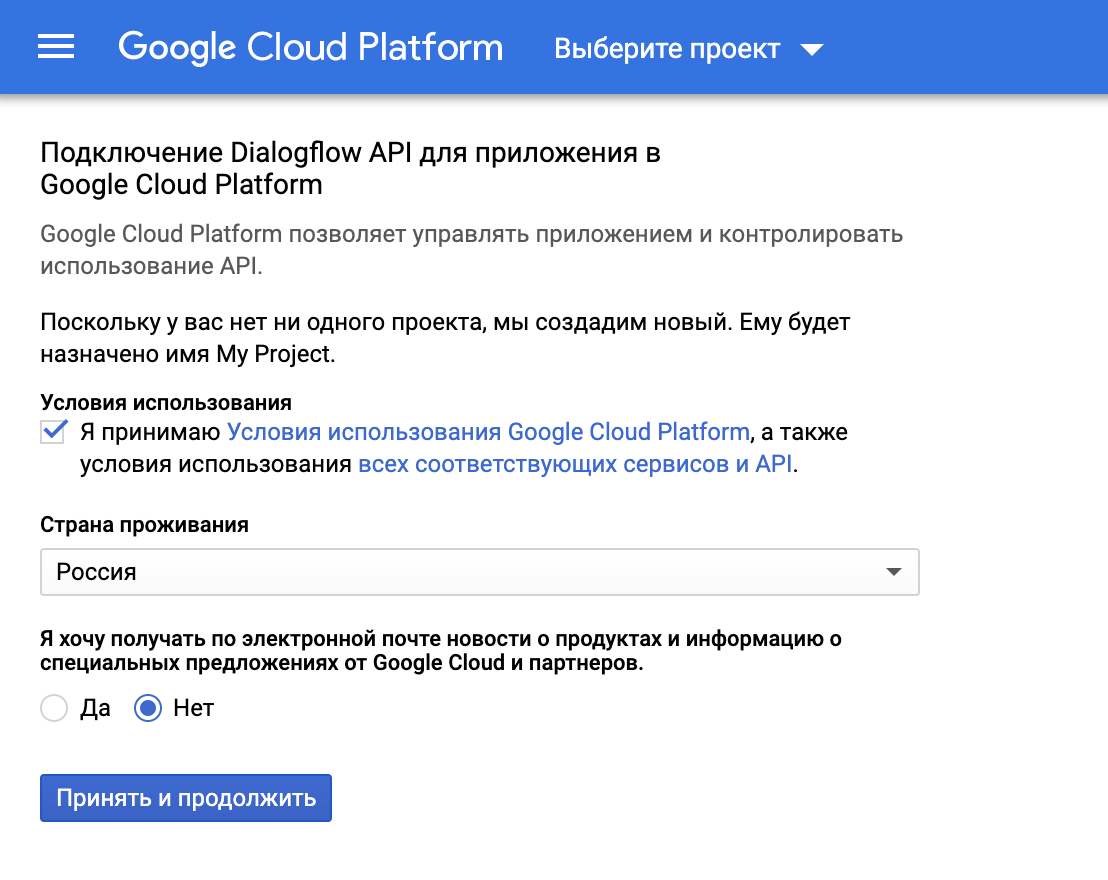

Выбираем свой проект

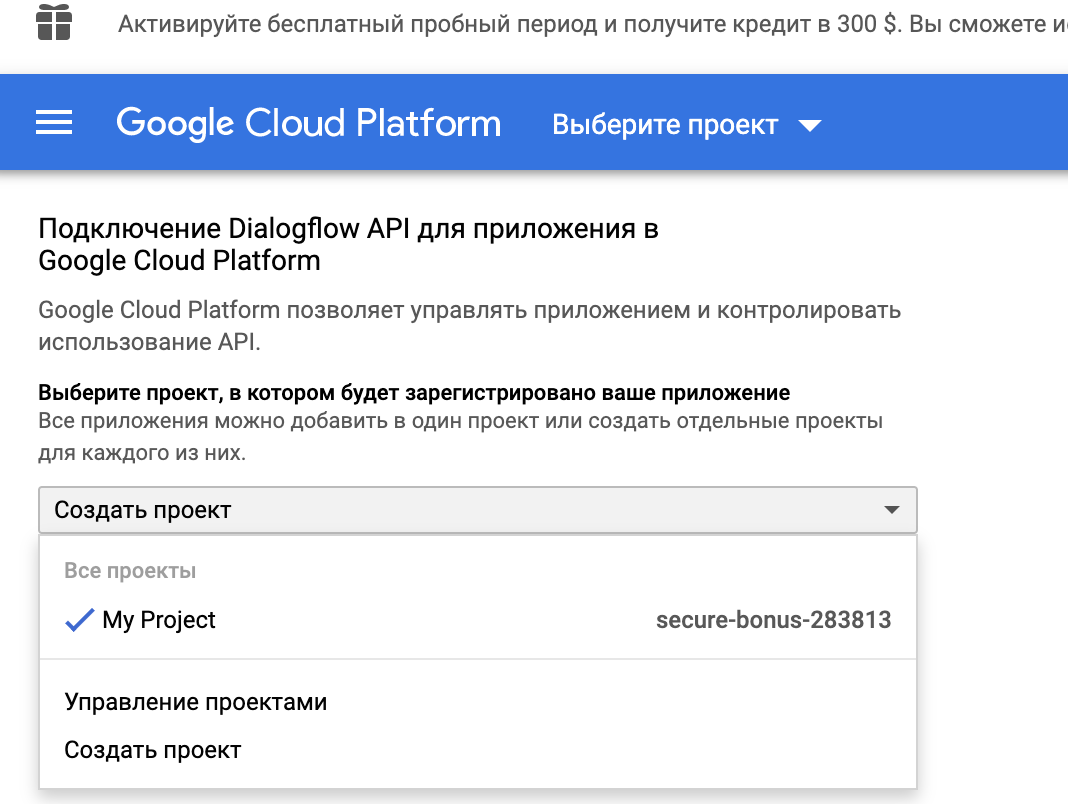

Создаем сервисный аккаунт

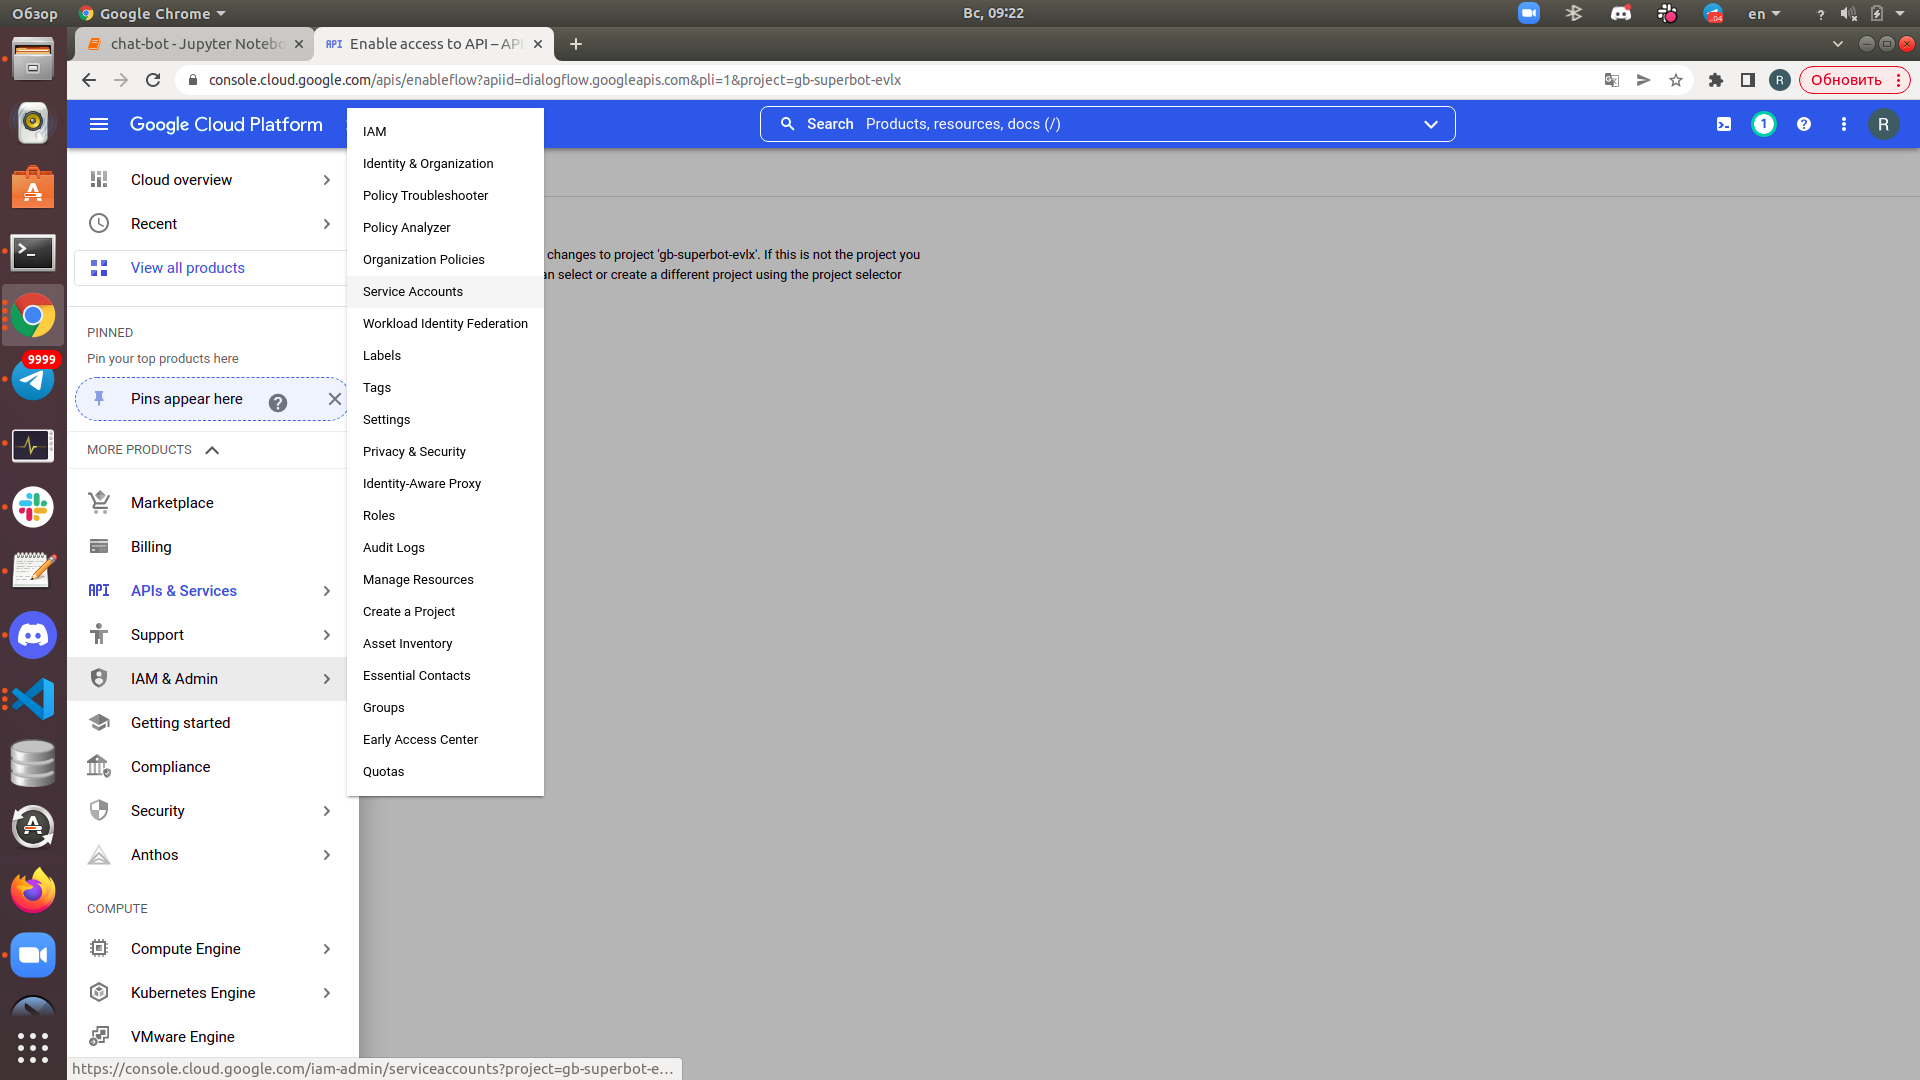

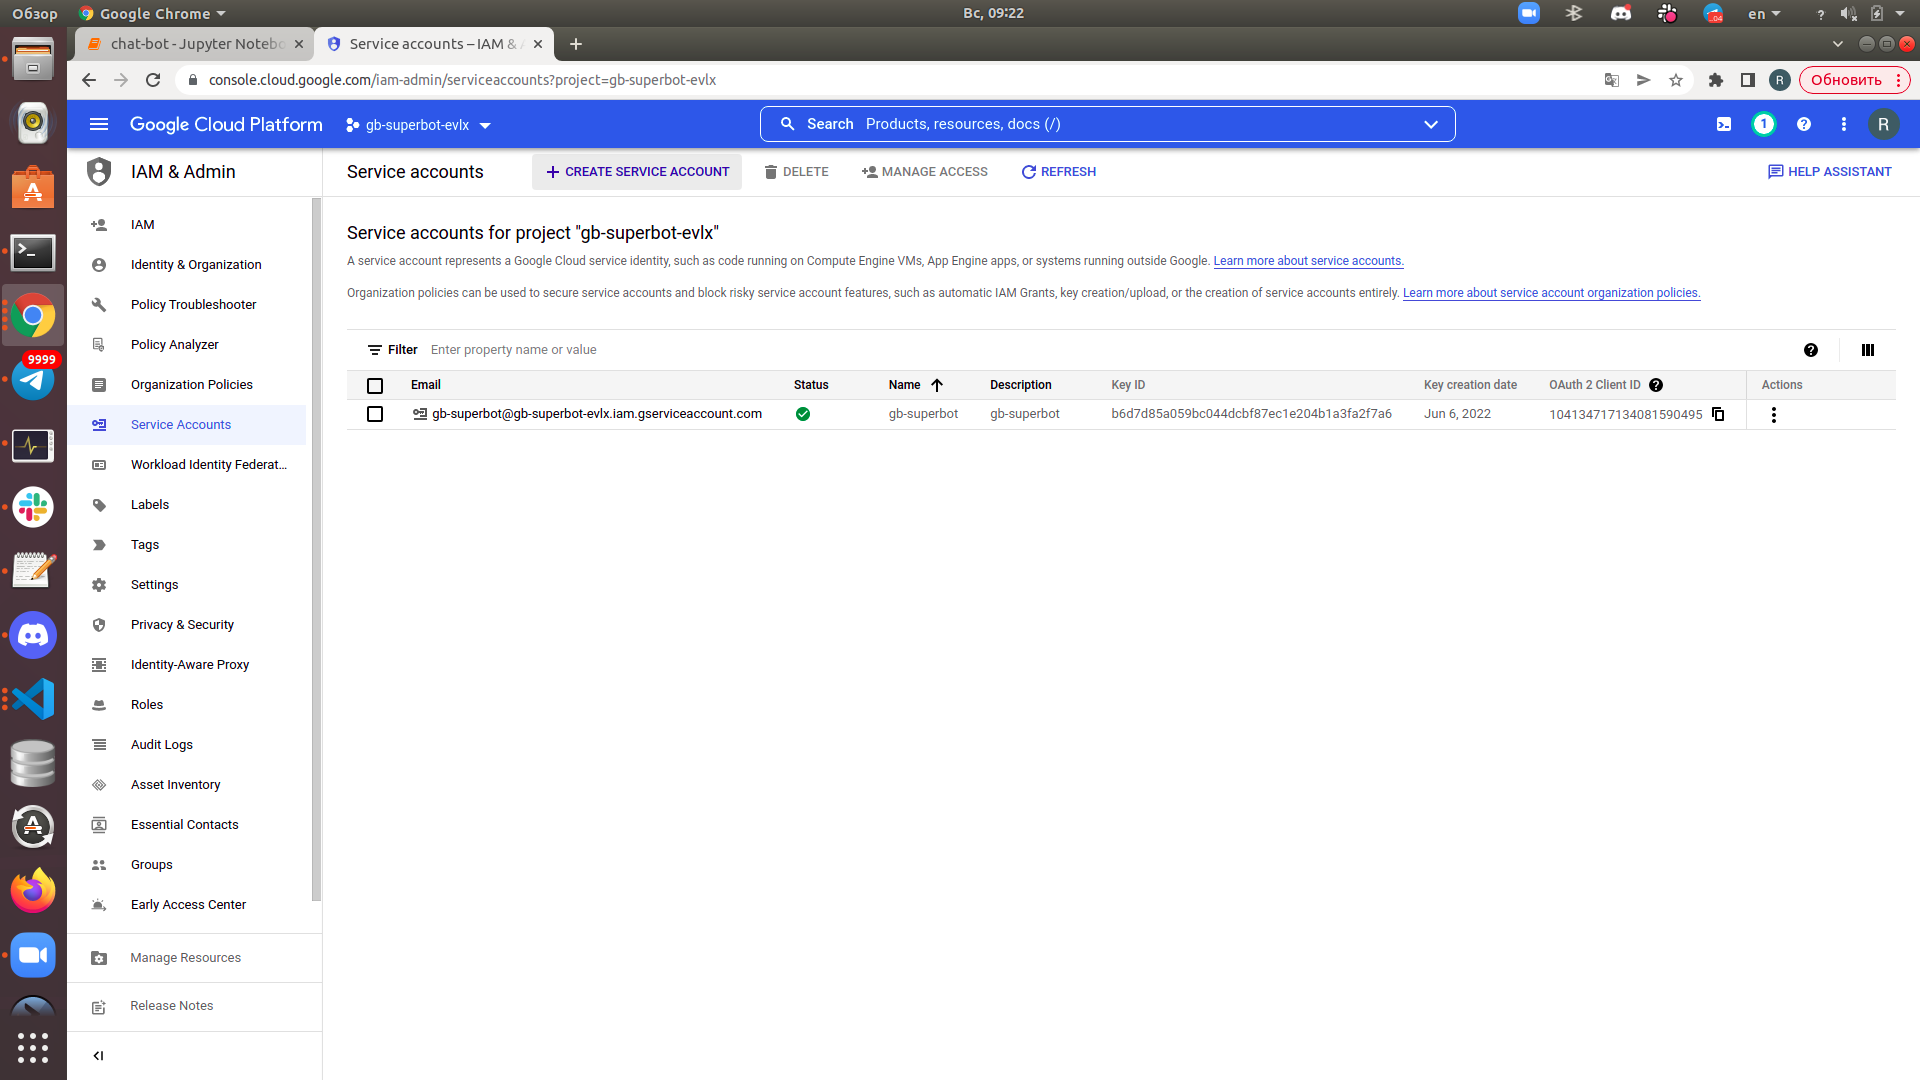

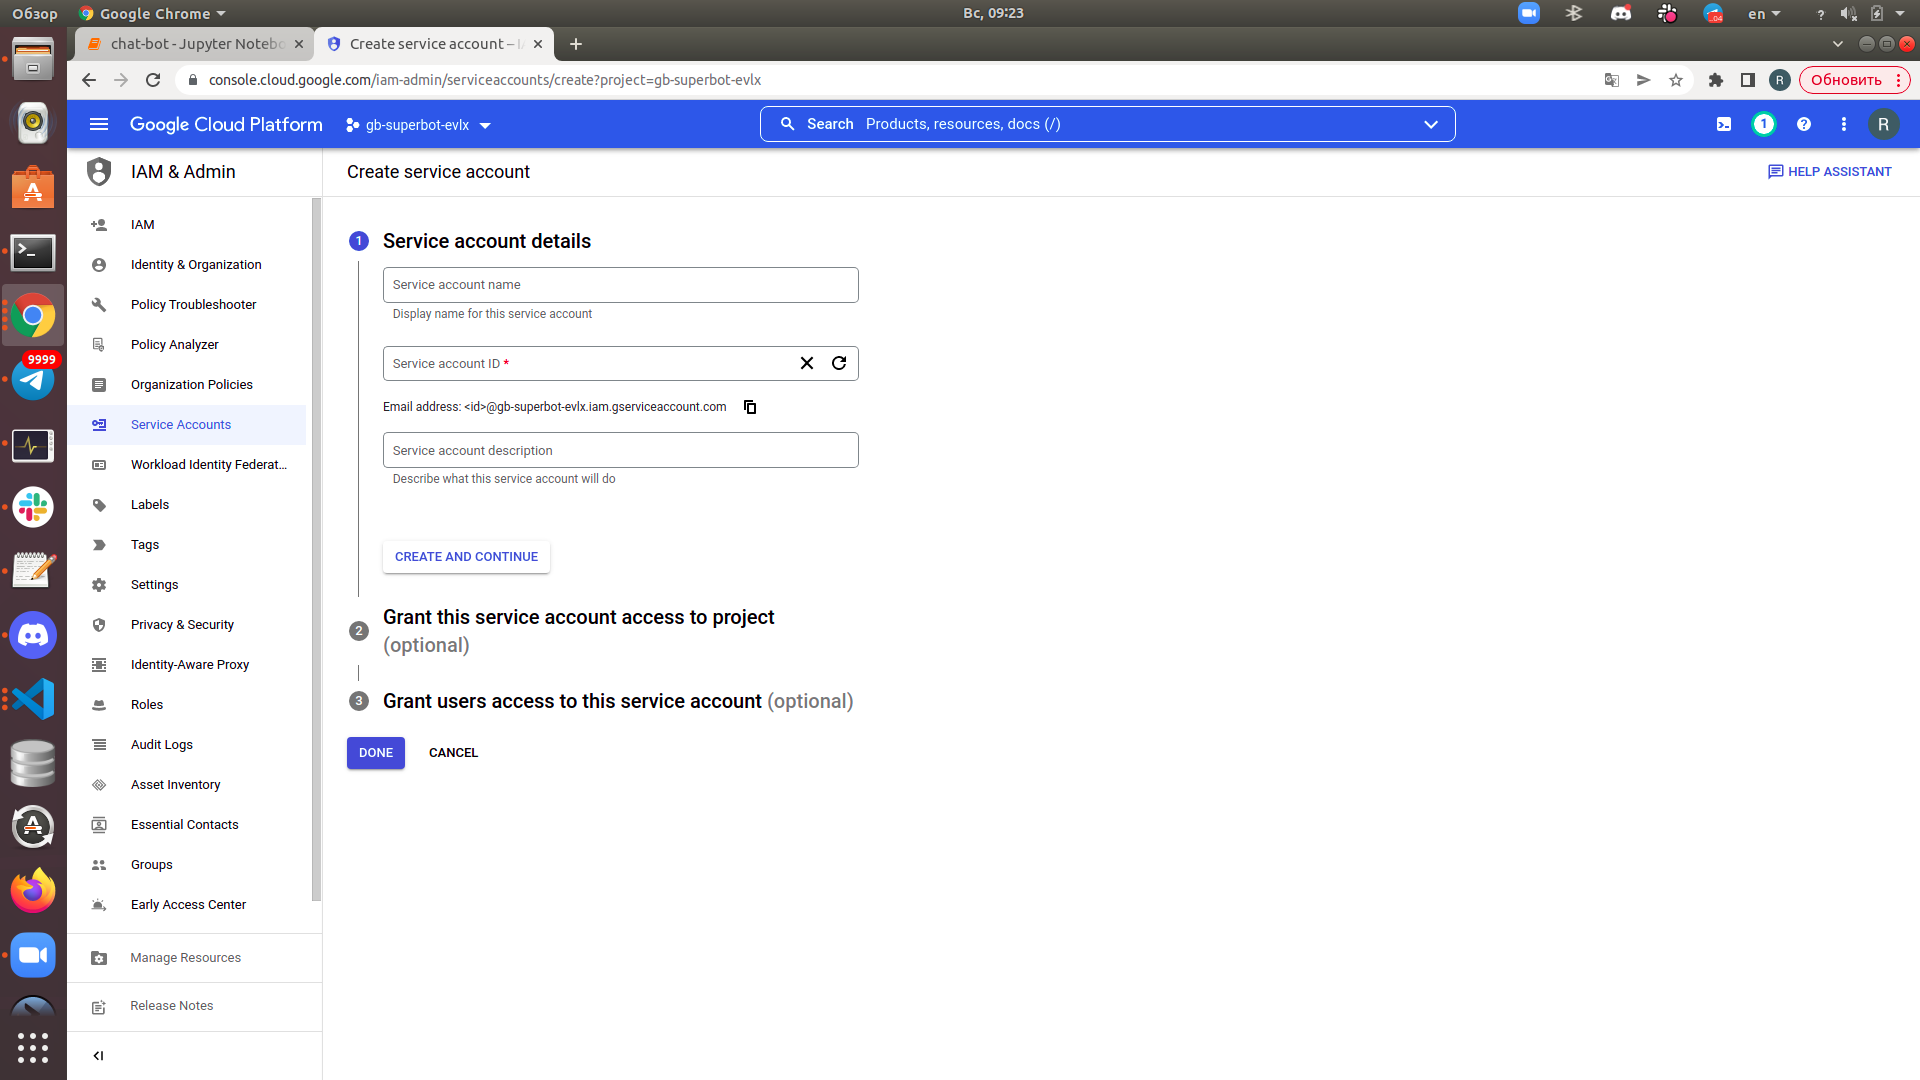

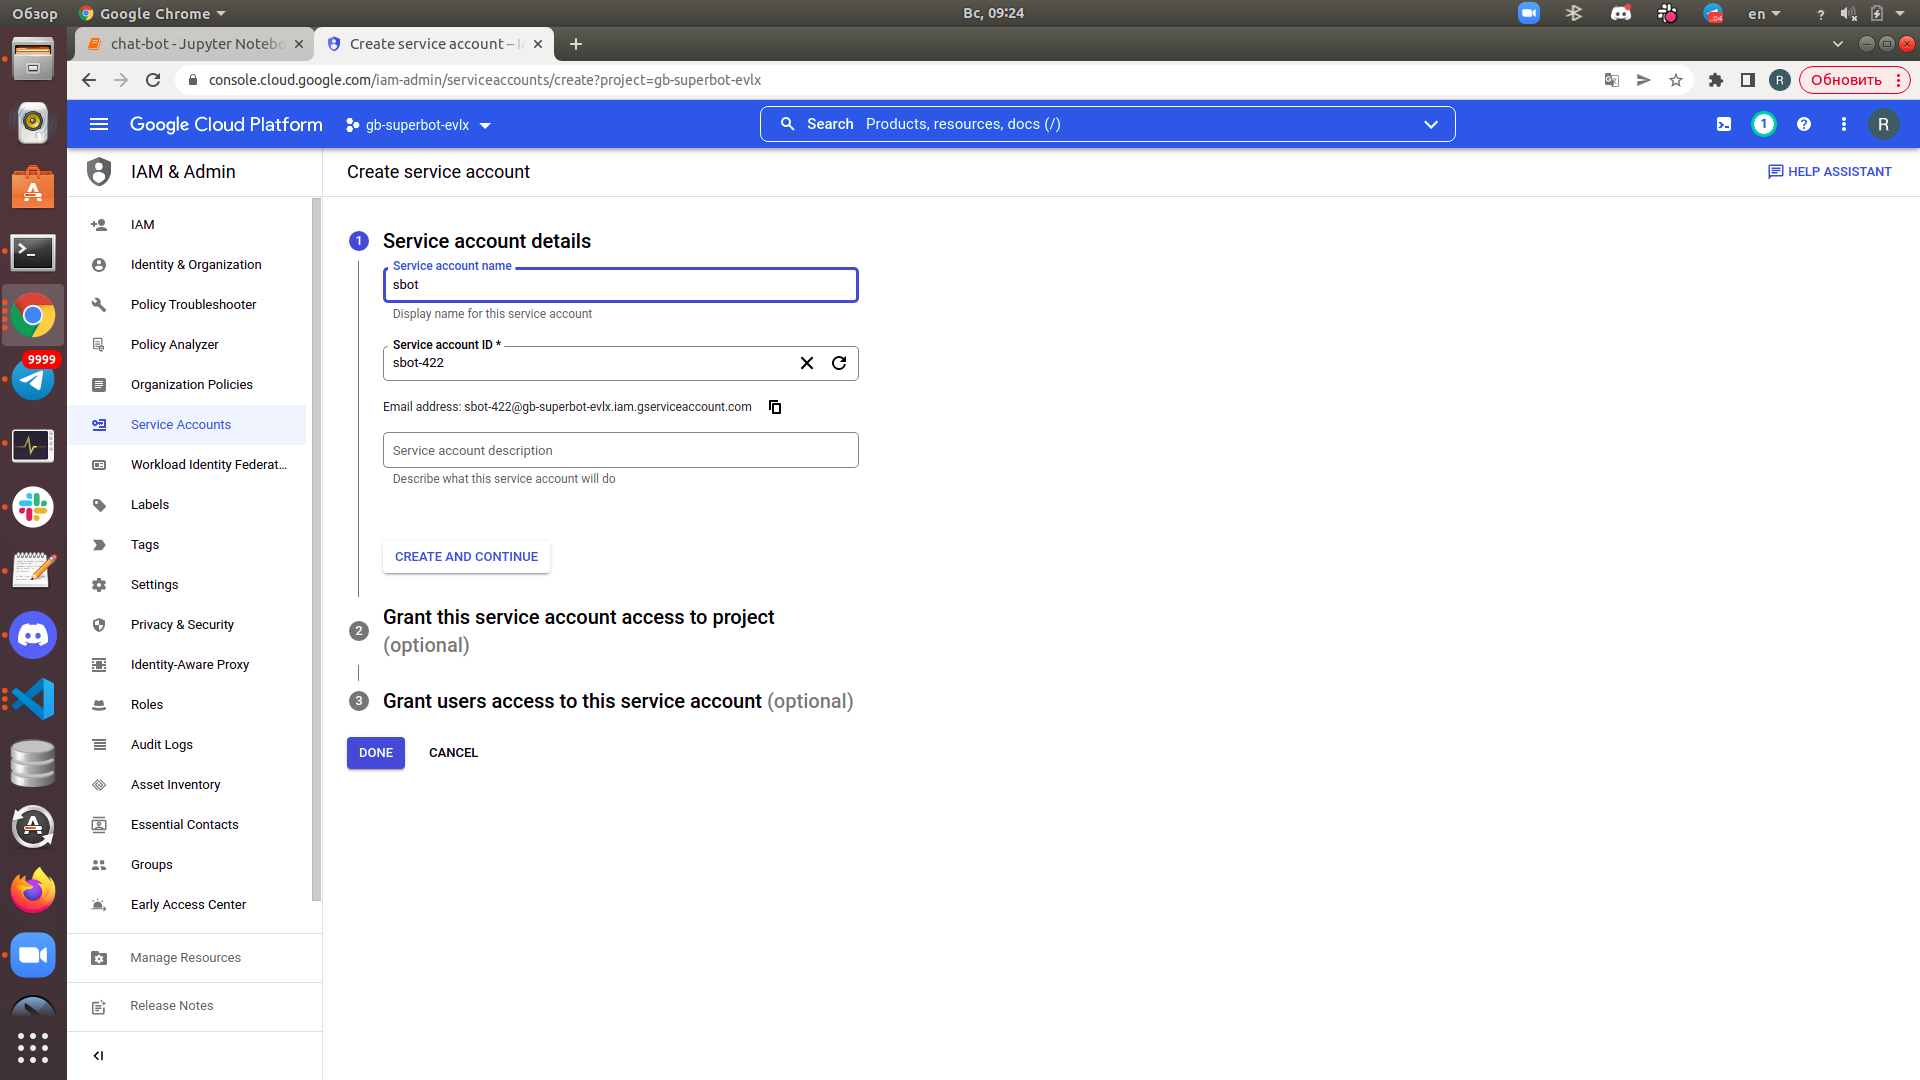

не забываем добавить роль без неё не будет доступа

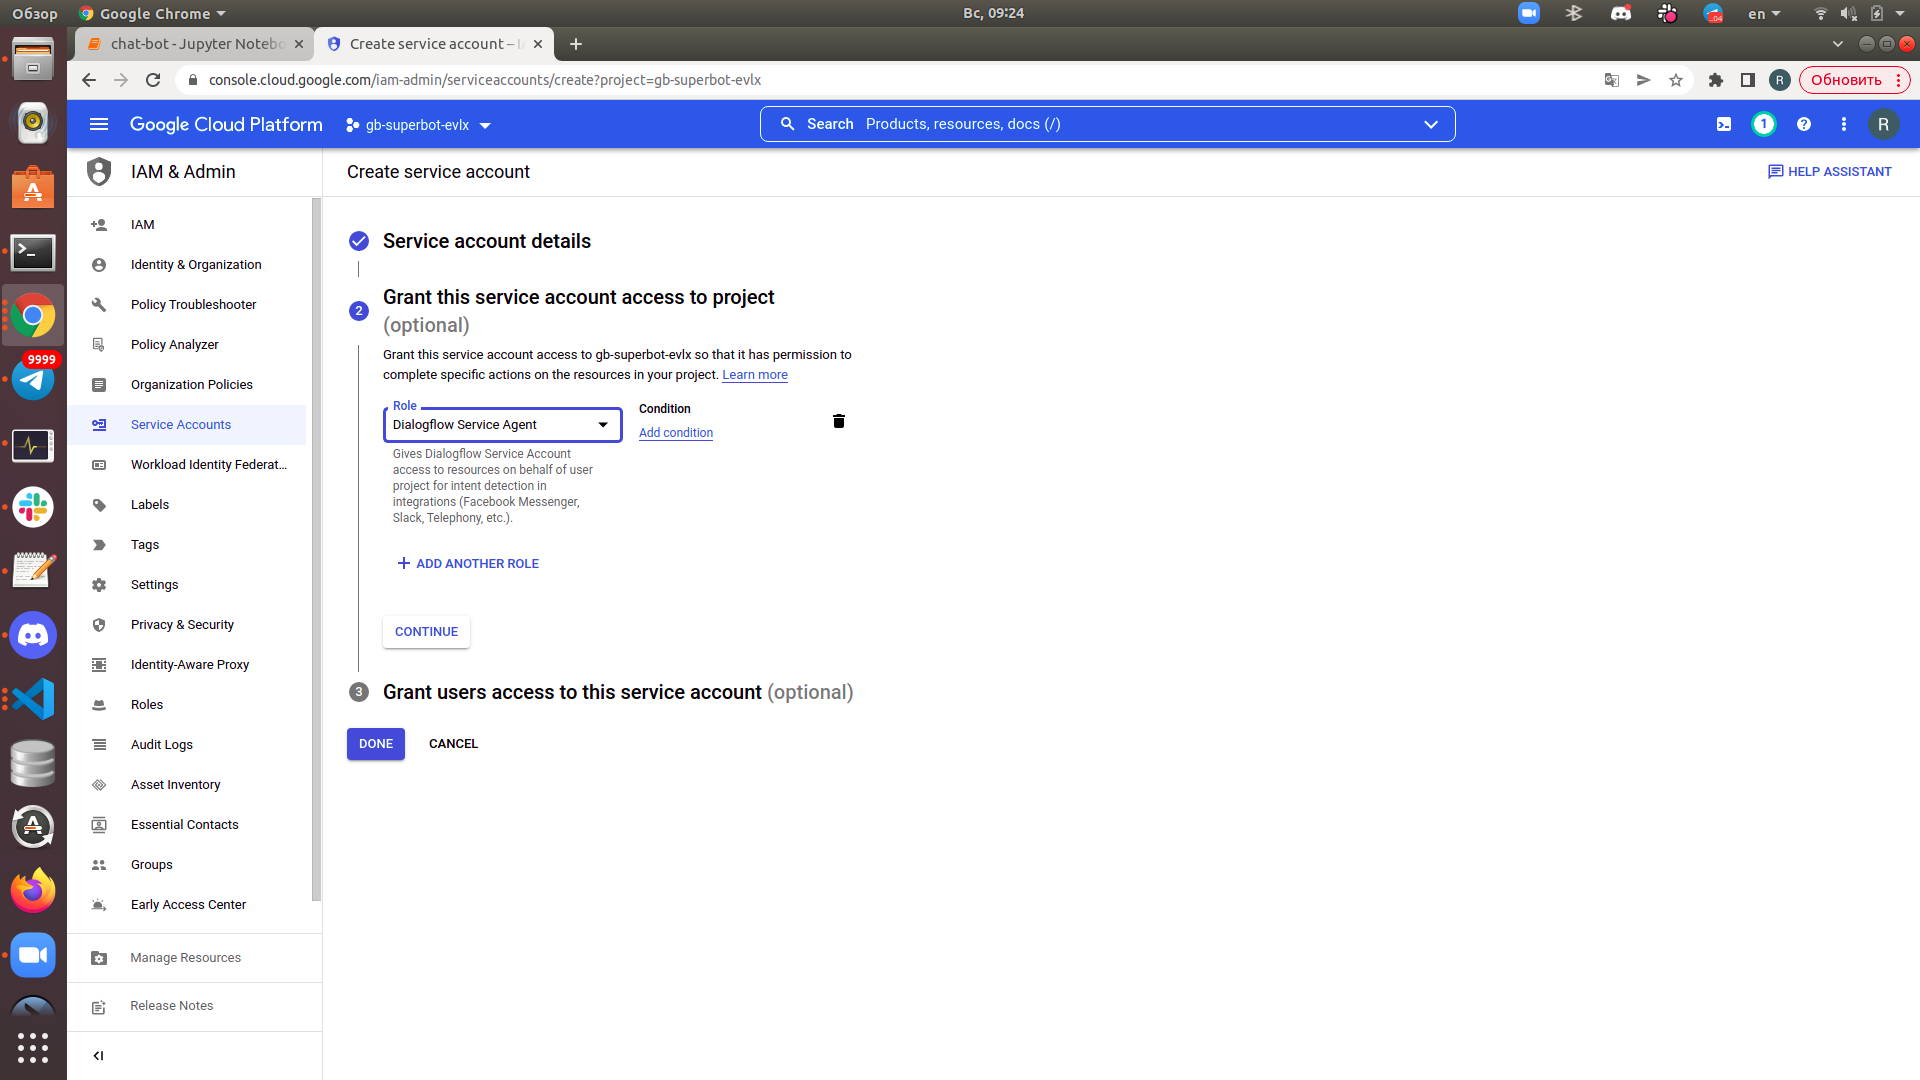

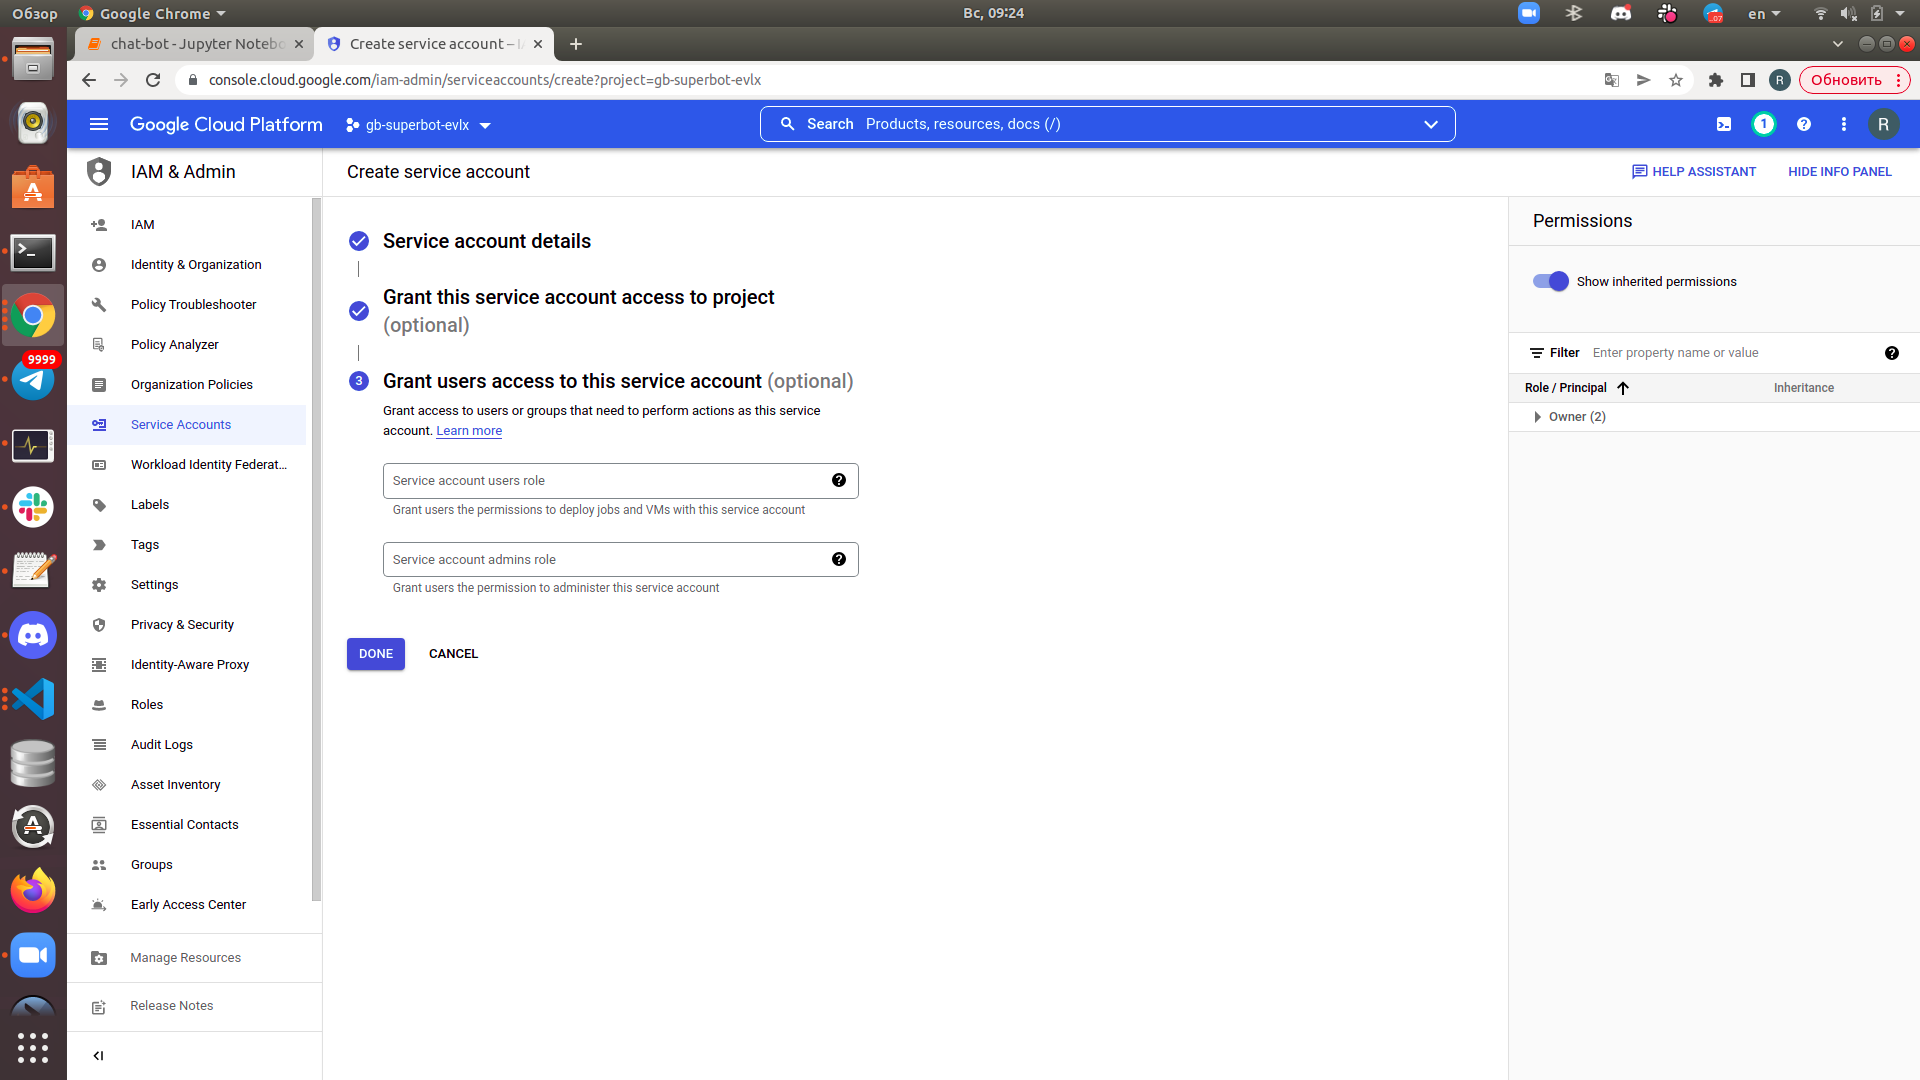

Создание ключа

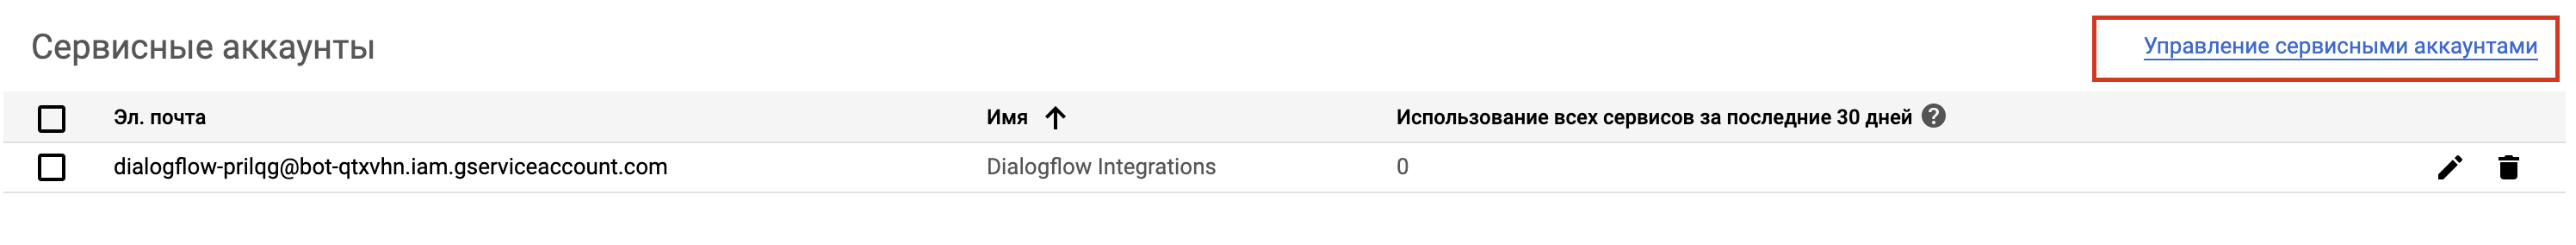

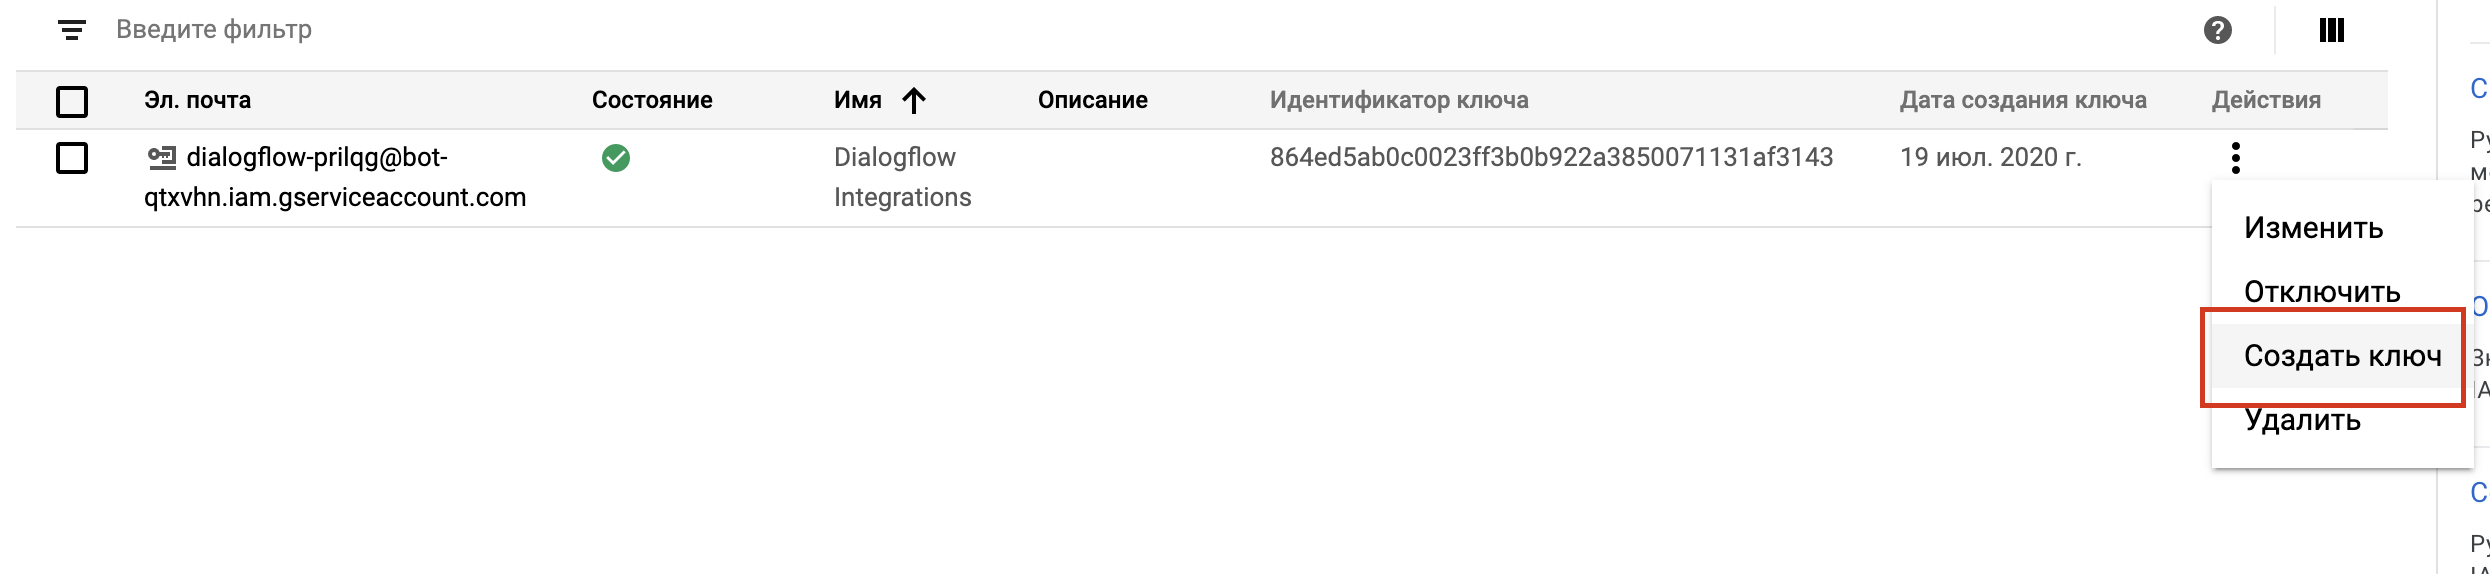

вид может быть другим

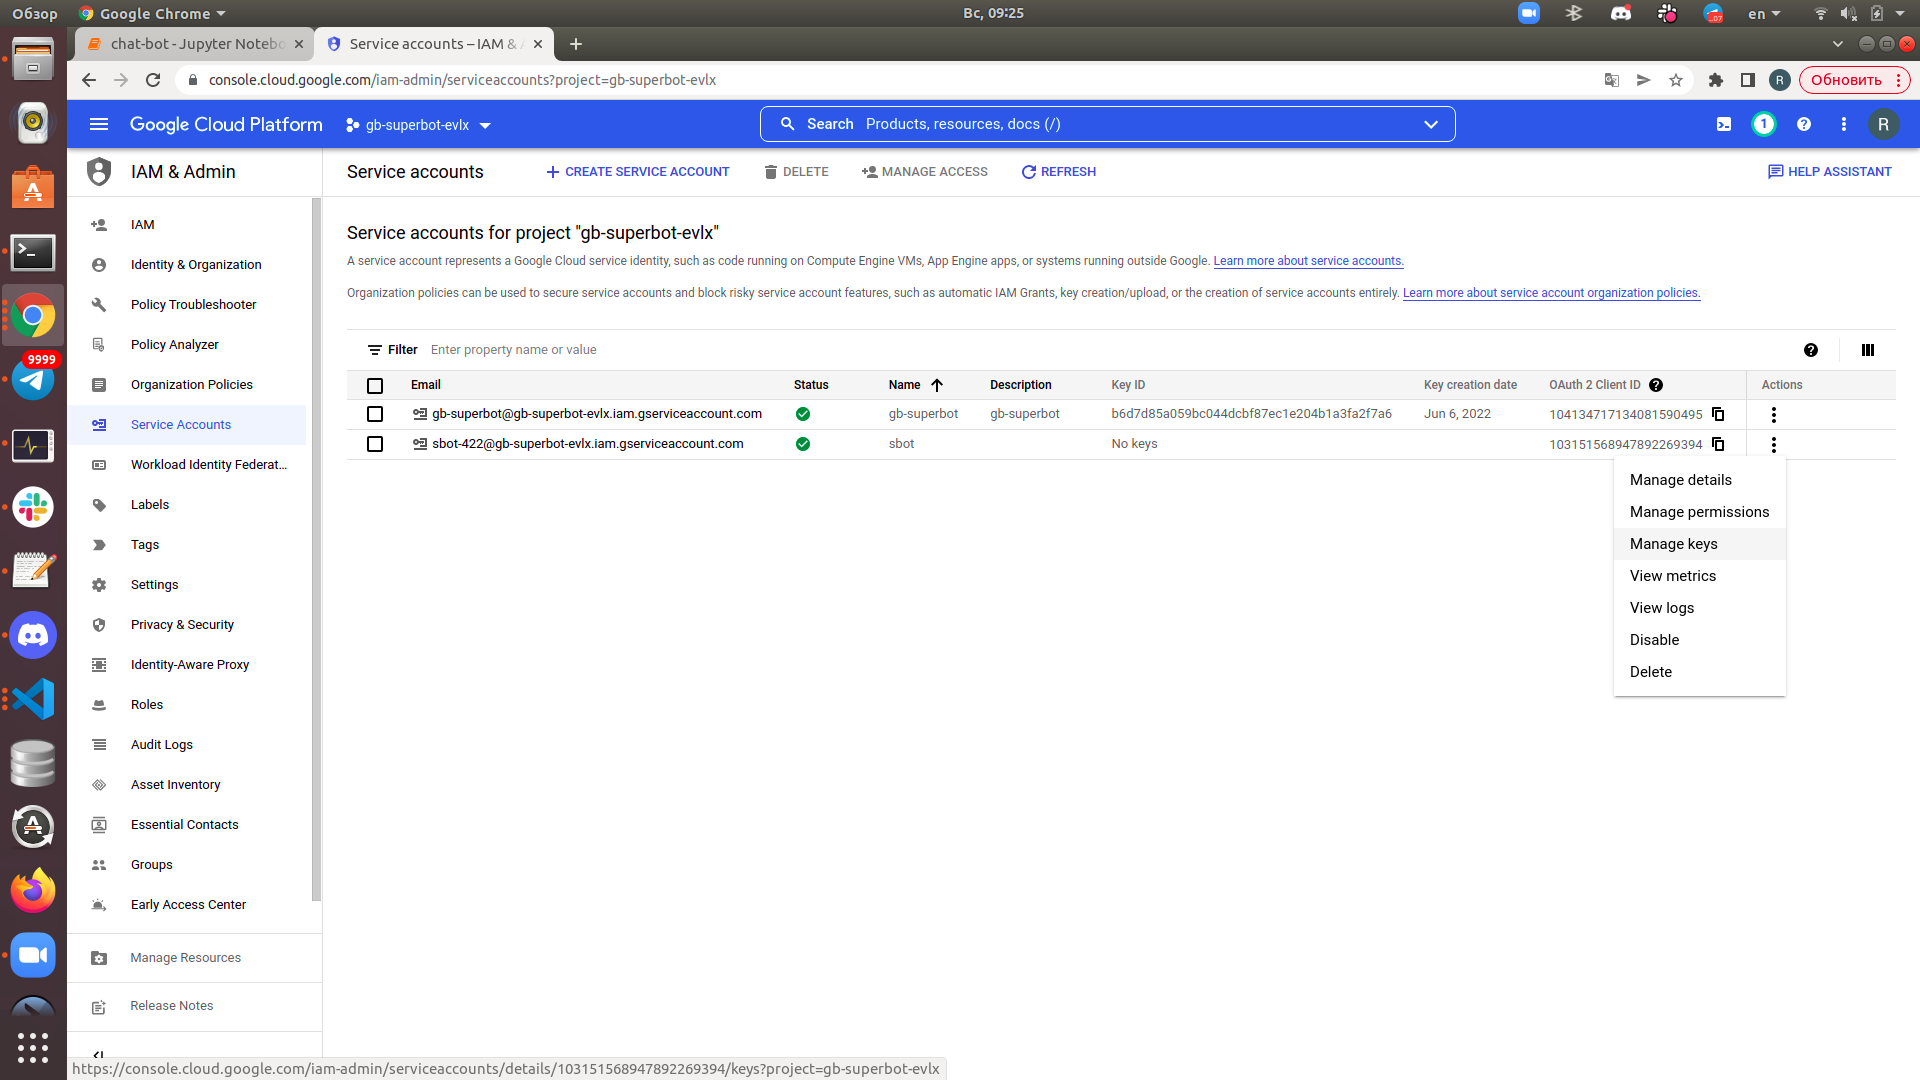

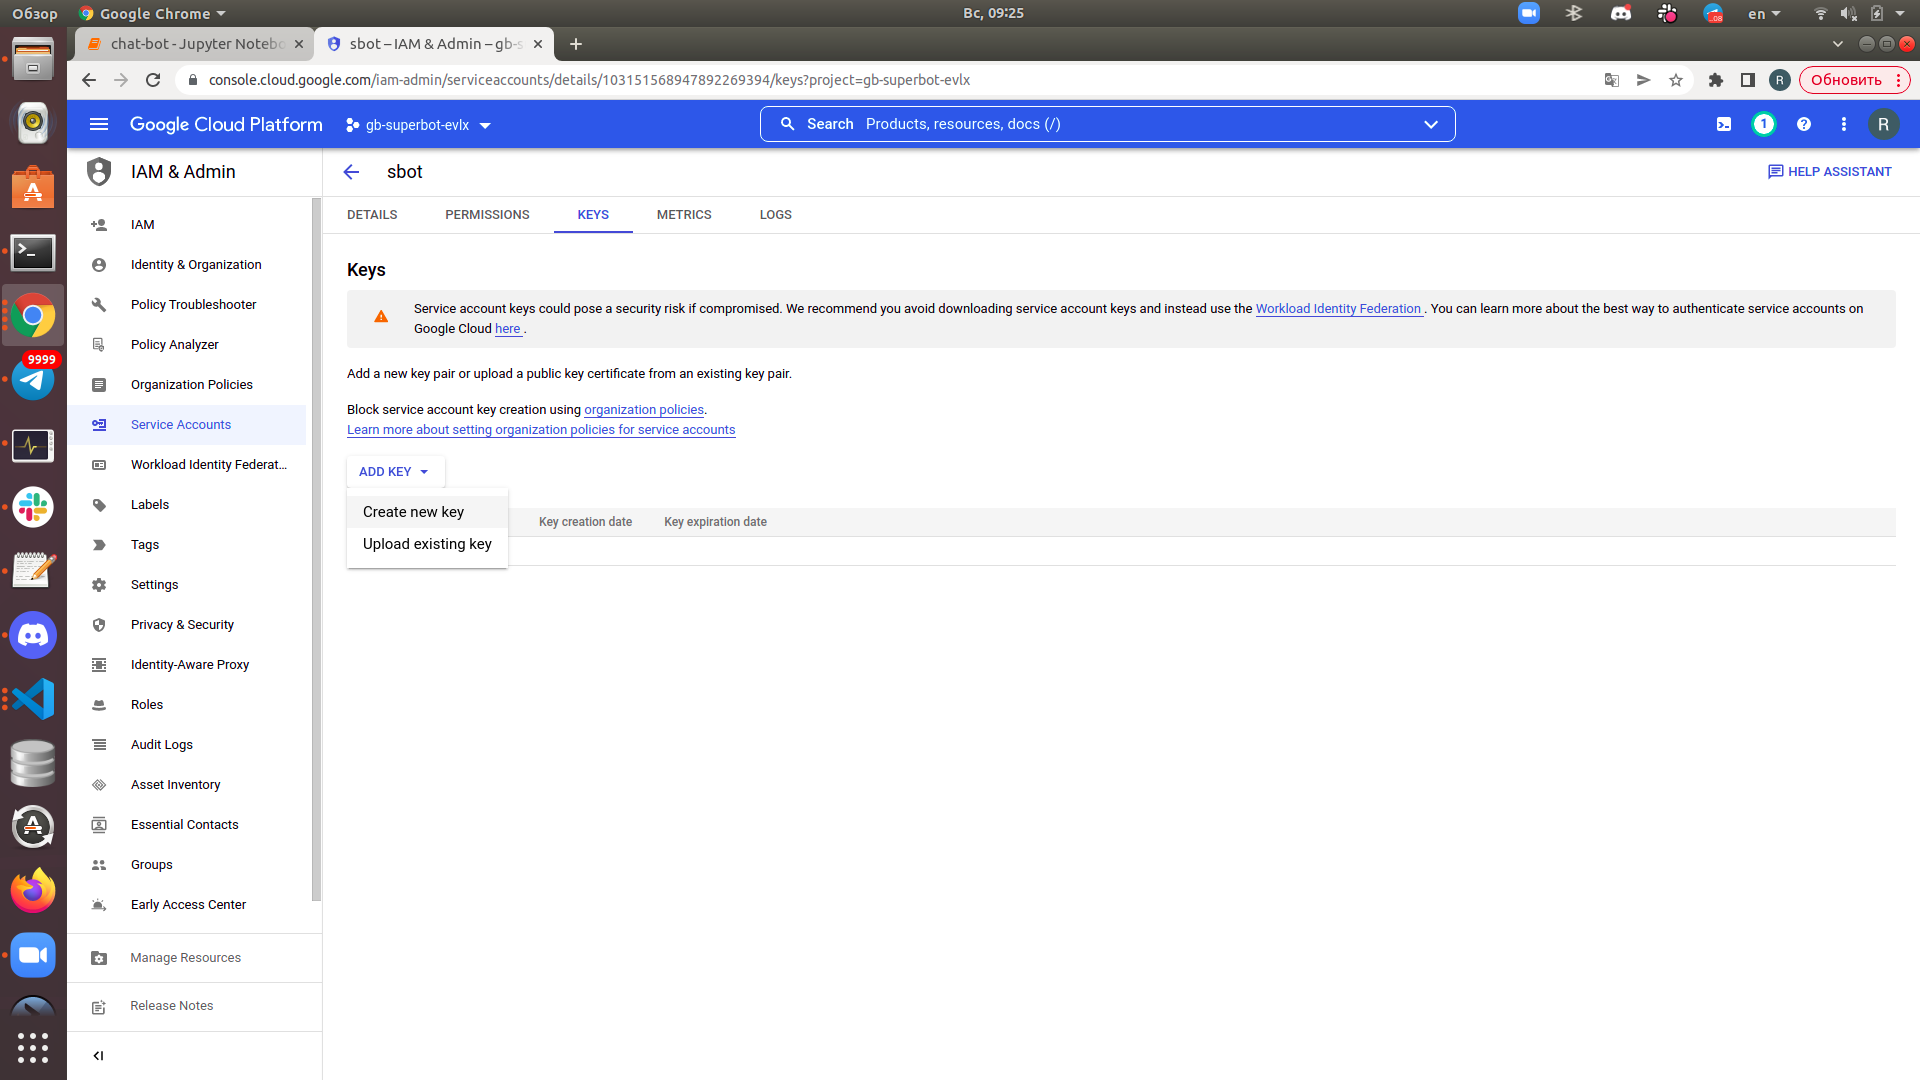

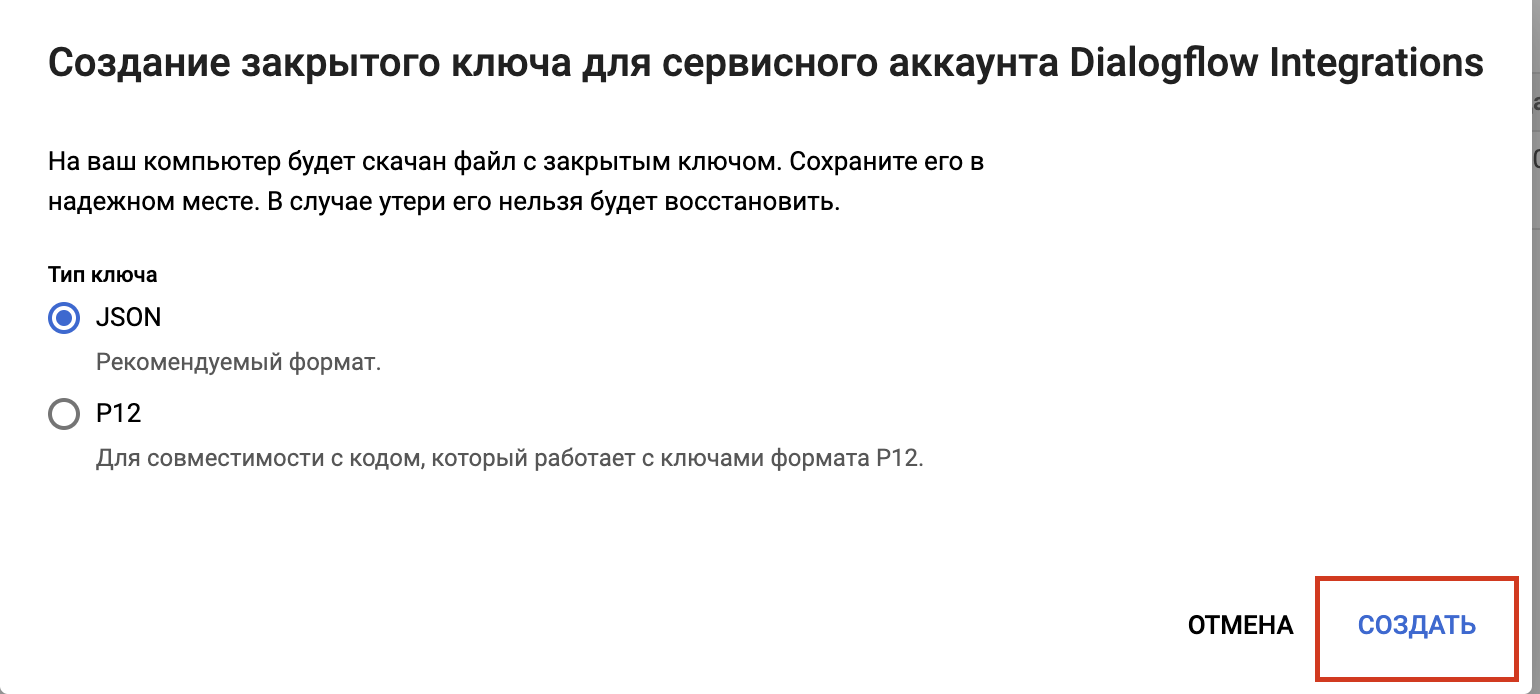

JSON должен скачаться. Выберите директорию с ботом

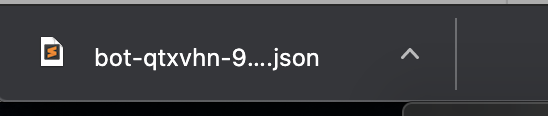

## Шаг 4 Настройки соединения

Перейдем в настройки в DialogFlow и скопипуем PROJECT ID

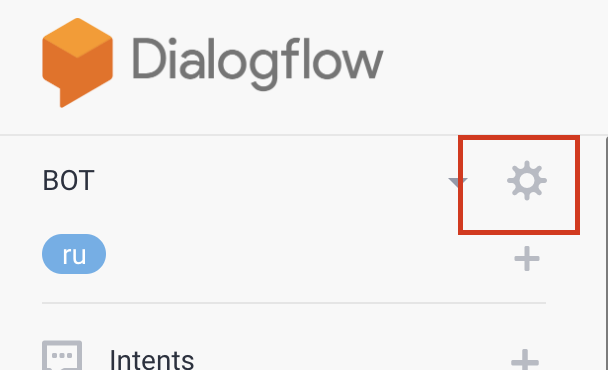

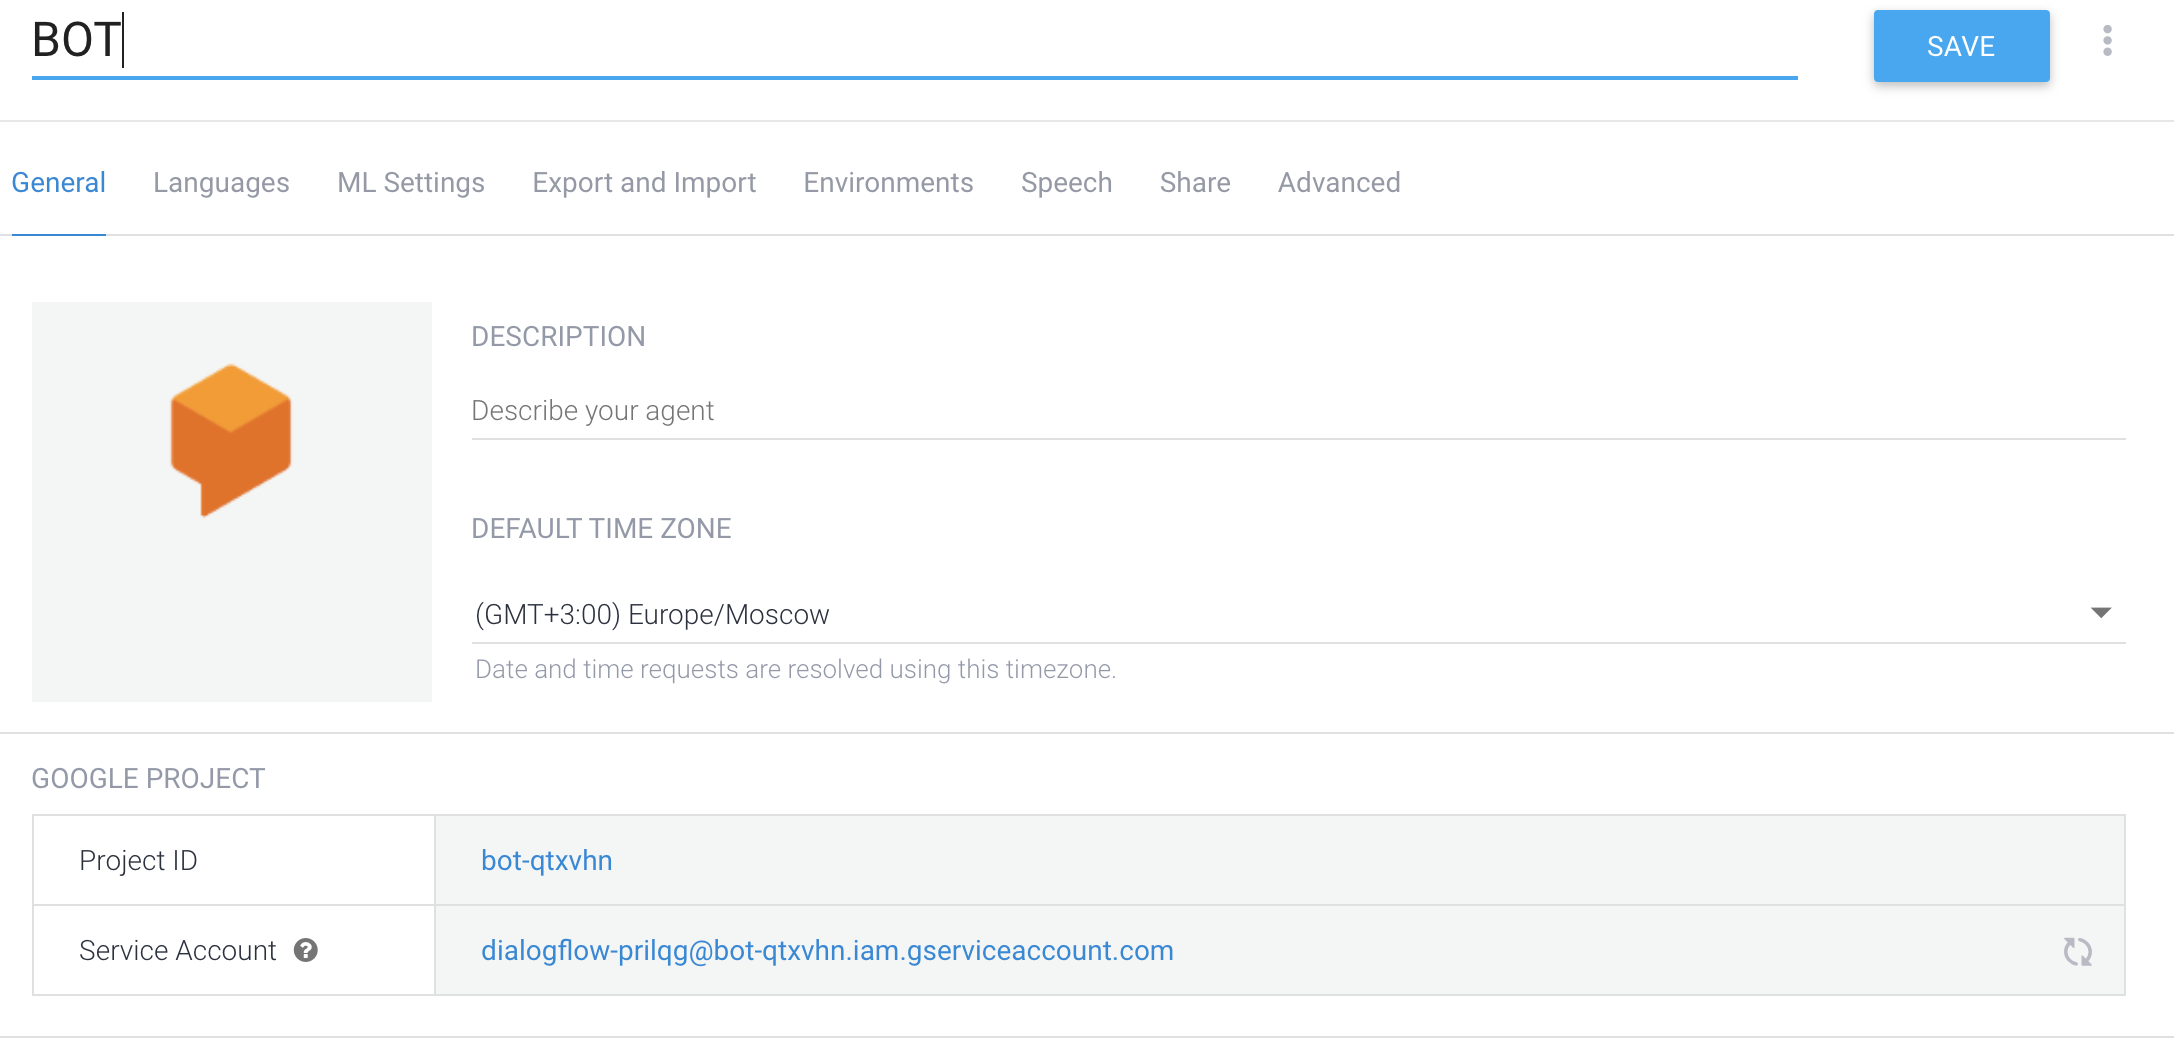

In [66]:
!pip install google-cloud-dialogflow

  Using cached google_cloud_dialogflow-2.14.0-py2.py3-none-any.whl (2.3 MB)


In [63]:
!pip install grpcio-status

  Using cached grpcio_status-1.46.3-py3-none-any.whl (10.0 kB)


In [58]:
!pip install google-api-core 

  Using cached google_api_core-2.8.1-py3-none-any.whl (114 kB)


In [56]:
!pip install google-cloud-vision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.8/383.8 kB 2.9 MB/s eta 0:00:00a 0:00:01


In [6]:
import os
import logging
from telegram import Update
from telegram.ext import Updater, CommandHandler, MessageHandler, Filters, CallbackContext

#import dialogflow

In [5]:
!ls *.json -lah

-rw-r--r-- 1 rzaharov domain users 2.3K Jun 22 21:38 botnlp-super-mxxt-ff54143f23e3.json
-rw-r--r-- 1 rzaharov domain users 2.3K Jun  4 09:38 gb-superbot-evlx-8ddaaab87296.json
-rw-r--r-- 1 rzaharov domain users 2.3K Jun 12 09:25 gb-superbot-evlx-b118a1fd4b25.json
-rw-r--r-- 1 rzaharov domain users 2.3K Jun  6 03:00 gb-superbot-evlx-b6d7d85a059b.json


In [7]:
updater = Updater("5037721599:AAFxPl5Xk0dHR_u2scLj8rA82xR8g1t38qY", use_context=True)  # Токен API к Telegram
dispatcher = updater.dispatcher
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = 'botnlp-super-mxxt-ff54143f23e3.json'# скачнный JSON


DIALOGFLOW_PROJECT_ID = 'botnlp-super-mxxt' #PROJECT ID из DialogFlow 
DIALOGFLOW_LANGUAGE_CODE = 'ru' # язык
SESSION_ID = 'GB_NLP12_21_bot'  # ID бота из телеграма

Переписываем функцию textMessage

In [8]:
from google.cloud import dialogflow

In [9]:
def detect_intent_texts(project_id, session_id, text, language_code):
    session_client = dialogflow.SessionsClient()
    session = session_client.session_path(project_id, session_id)
    
    text_input = dialogflow.TextInput(text=text, language_code=language_code)
    query_input = dialogflow.QueryInput(text=text_input)

    response = session_client.detect_intent(
        request={"session": session, "query_input": query_input}
    )

        
    return response.query_result.fulfillment_text


In [10]:
def startCommand(update: Update, context: CallbackContext):
    update.message.reply_text('Добрый день!')

    
def textMessage(update: Update, context: CallbackContext):
    text_user = update.message.text
    
    
    text_bot = detect_intent_texts(DIALOGFLOW_PROJECT_ID, SESSION_ID, text_user, DIALOGFLOW_LANGUAGE_CODE)
    if text_bot:
        update.message.reply_text(text_bot)
    else:
        update.message.reply_text('Что?')

In [11]:
# on different commands - answer in Telegram
dispatcher.add_handler(CommandHandler("start", startCommand))
dispatcher.add_handler(MessageHandler(Filters.text & ~Filters.command, textMessage))

In [ ]:
# Start the Bot
updater.start_polling()
updater.idle()